**COMPUTER VISION PROJECT**

**TOPIC: GENDER DETECTION**

In [1]:
## IMport libraries
import warnings
warnings.filterwarnings("ignore")
import os, cv2, random
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import ticker
import seaborn as sns
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops, local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import zipfile
import io

Populating the interactive namespace from numpy and matplotlib


In [2]:
## import male zip file
male_zip_path = '/content/male1.zip'
## import female zipfile
female_zip_path = '/content/female1.zip'

In [3]:
## Process images inside the zip file to extract them and make them ready for further process

In [4]:
# Function to process images from a zip file
def process_images_from_zip(zip_path):
    with zipfile.ZipFile(zip_path) as zip_file:
        image_files = [file for file in zip_file.namelist() if file.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        extracted_images = []
        for image_file in image_files:
            with zip_file.open(image_file) as file:
                img_data = file.read()
                img_np_array = np.frombuffer(img_data, np.uint8)
                img_cv2 = cv2.imdecode(img_np_array, -1)
                if img_cv2 is not None:
                    extracted_images.append(img_cv2)
    return extracted_images

In [5]:
## Resizing the images to a universal size of 128, 128 for all images for further processes

In [6]:
# Function to resize images for pre processing
def resize_images(images):
    resized = []
    for img in images:
        if isinstance(img, np.ndarray):
            resized_img = cv2.resize(img, (64,64))
            resized.append(resized_img)
        else:
            print("Image not a valid numpy array:", img)
    return resized

In [7]:
## Apply all the resize function
male_re= resize_images(process_images_from_zip(male_zip_path))
female_re=resize_images(process_images_from_zip(female_zip_path))


In [8]:
# Check the first few images to see if they're valid numpy arrays
print("Resized males:", len(male_re))
print("Resized females:", len(female_re))

Resized males: 2498
Resized females: 2500


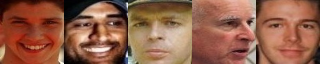

In [9]:
# Printing the first five images of the male zip file for the sample
# Select the first 5 images
selected_images = male_re[:5]

# Concatenate the first 5 images horizontally
male_sample = selected_images[0]
for i in range(1, len(selected_images)):
    male_sample = cv2.hconcat([male_sample, selected_images[i]])

# Display the horizontally concatenated image
cv2_imshow(male_sample)



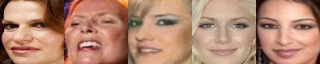

In [10]:
## Printing the first 5 females of the female zip file

# Select the first 5 images
selected_images = female_re[:5]

# Concatenate the first 5 images horizontally
female_sample = selected_images[0]
for i in range(1, len(selected_images)):
    female_sample = cv2.hconcat([female_sample, selected_images[i]])

# Display the horizontally concatenated image
cv2_imshow(female_sample)

In [11]:
## Converting the color images to gray scale which makes it easy for Computer Vision process

In [12]:
## Create two lits to store-converted gray images
gray_male=[]
gray_female=[]

In [13]:
## Create a function to convert color images to gray
def convert_to_gray(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

In [14]:
## apply the function to male and female images and append them to respective lists
for i in male_re:
  x=convert_to_gray(i)
  gray_male.append(x)


for i in female_re:
  y=convert_to_gray(i)
  gray_female.append(y)



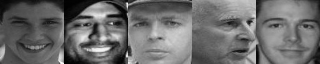

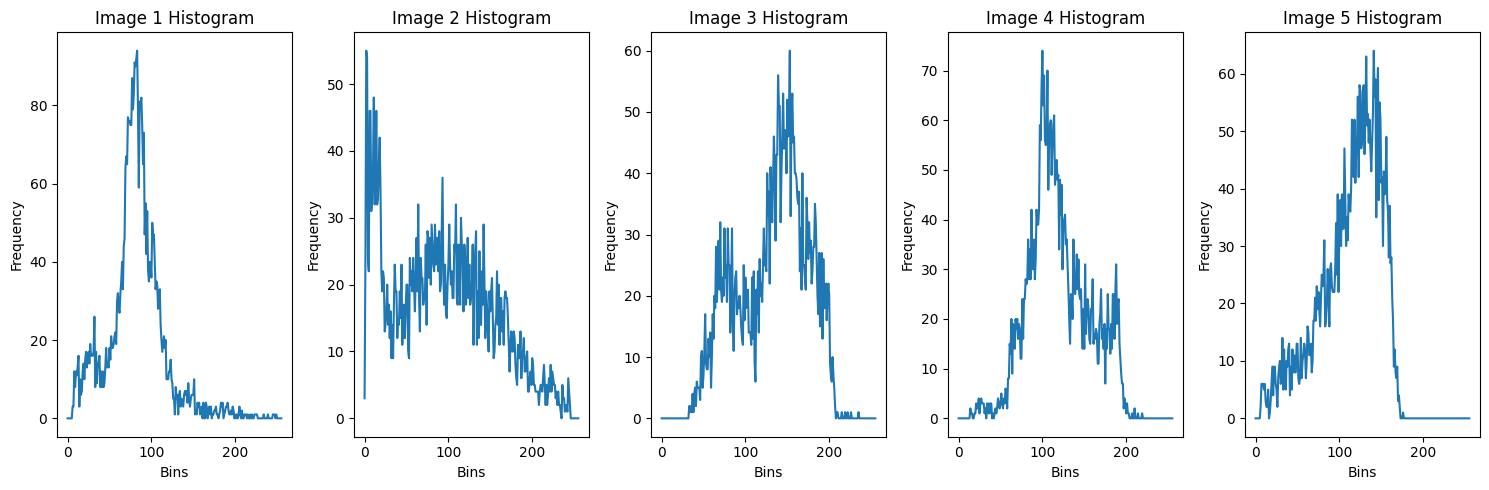

In [15]:
# Select the first 5 images
selected_images = gray_male[:5]

# Concatenate the first 5 images horizontally
male_sample = selected_images[0]
for i in range(1, len(selected_images)):
    male_sample = cv2.hconcat([male_sample, selected_images[i]])

# Display the horizontally concatenated image
cv2_imshow(male_sample)
# Plot histograms for the selected grayscale male images
plt.figure(figsize=(15, 5))

for i, img in enumerate(selected_images):
    plt.subplot(1, 5, i + 1)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(f"Image {i+1} Histogram")
    plt.xlabel('Bins')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

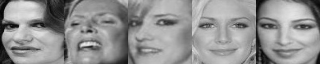

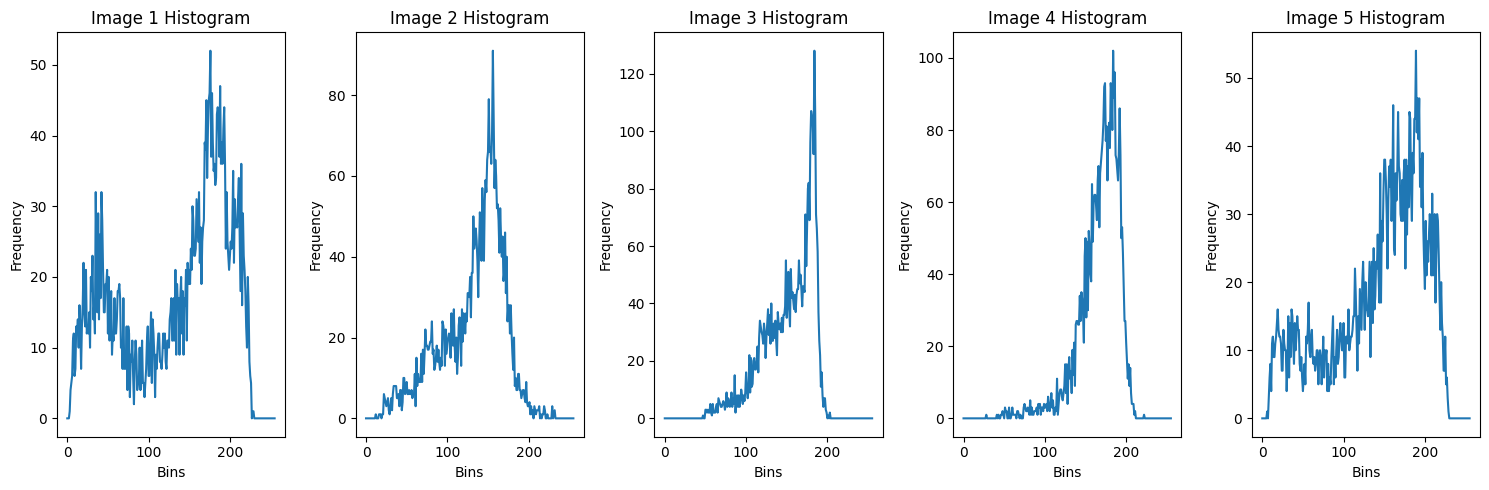

In [16]:
# Select the first 5 images
selected_images = gray_female[:5]

# Concatenate the first 5 images horizontally
female_sample = selected_images[0]
for i in range(1, len(selected_images)):
    female_sample = cv2.hconcat([female_sample, selected_images[i]])

# Display the horizontally concatenated image
cv2_imshow(female_sample)
# Plot histograms for the selected grayscale male images
plt.figure(figsize=(15, 5))

for i, img in enumerate(selected_images):
    plt.subplot(1, 5, i + 1)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(f"Image {i+1} Histogram")
    plt.xlabel('Bins')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Image Pre Processing


### Image Enhancement

In [17]:
## Applying percentiles to perform contrast stretching

In [18]:
##Creata a function for percentile based contrast
def contrast_stretching_percentile(image, percentile_min, percentile_max):
    # Calculate the minimum and maximum pixel values based on percentiles
    min_val = np.percentile(image, percentile_min)
    max_val = np.percentile(image, percentile_max)

    # Apply contrast stretching and normalize to the 0-255 range
    stretched_image = np.clip((image - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)

    return stretched_image

In [19]:
## Setting the percentile values
percentile_min = 5
percentile_max = 93

In [20]:
## Create lists to store contrast enhanced
percentile_male_gray=[]
percentile_female_gray=[]


Male enhanced images with percentile based


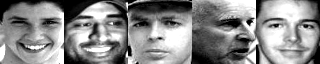

In [21]:
print("Male enhanced images with percentile based")
# Perform contrast stretching and store the enhanced images
for i in gray_male:
    e_male = contrast_stretching_percentile(i, percentile_min, percentile_max)
    percentile_male_gray.append(e_male)

# Combine the first 5 images into a single canvas using OpenCV
combined_images = np.hstack(percentile_male_gray[:5])

# Display the combined images using OpenCV
cv2_imshow(combined_images)


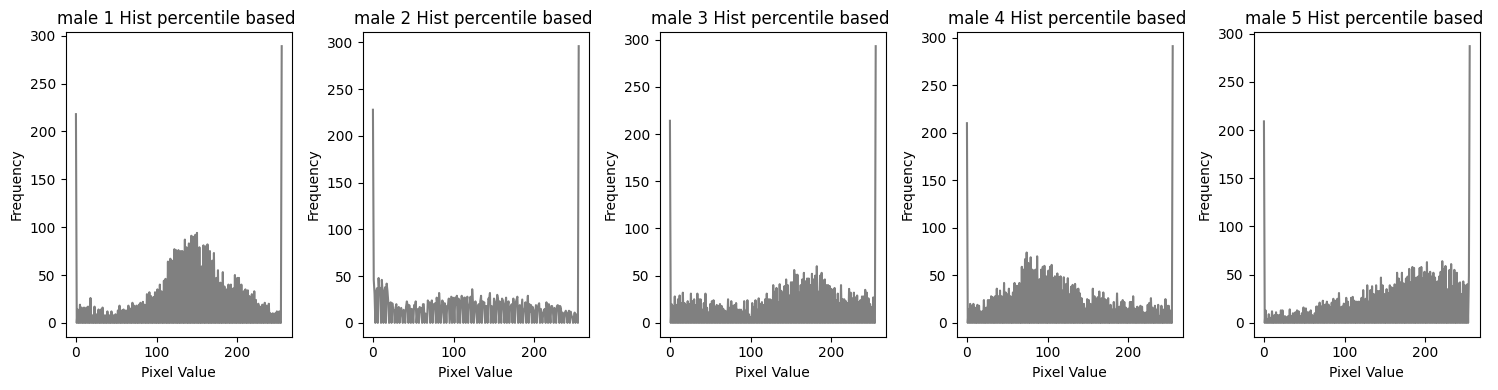

In [22]:
# Display first five enhanced images and their histograms
plt.figure(figsize=(15, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    hist_data = cv2.calcHist([percentile_male_gray[i]], [0], None, [256], [0, 256])
    plt.plot(hist_data, color='gray')
    plt.title(f'male {i+1} Hist percentile based ')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Female enhanced images with percentile based


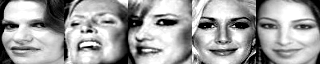

In [23]:
print("Female enhanced images with percentile based")
# Perform contrast stretching and store the enhanced images
for i in gray_female:
    e_female = contrast_stretching_percentile(i, percentile_min, percentile_max)
    percentile_female_gray.append(e_female)

# Combine the first 5 images into a single canvas using OpenCV
combined_images = np.hstack(percentile_female_gray[:5])

# Display the combined images using OpenCV
cv2_imshow(combined_images)

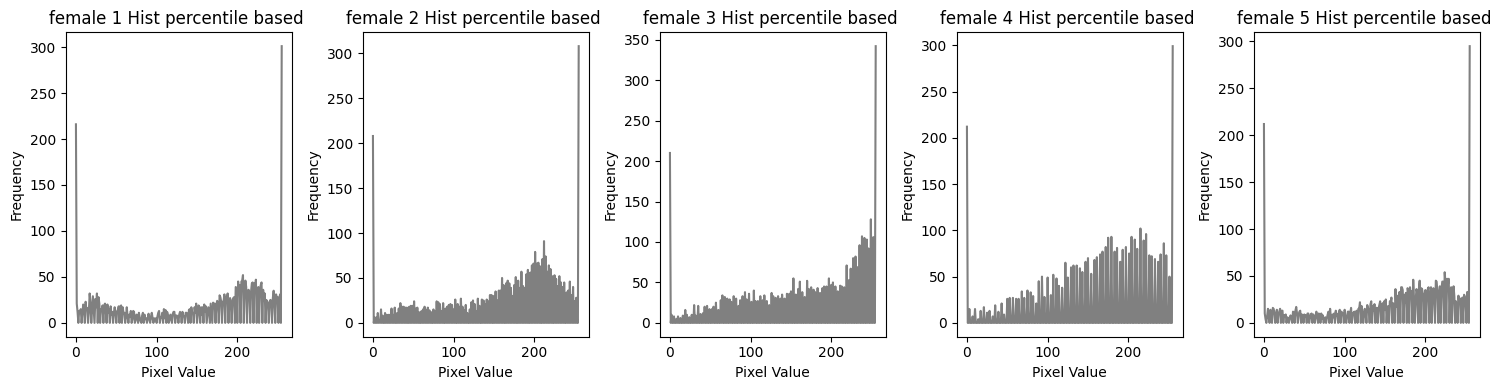

In [24]:
# Display first five enhanced images and their histograms
plt.figure(figsize=(15, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    hist_data = cv2.calcHist([percentile_female_gray[i]], [0], None, [256], [0, 256])
    plt.plot(hist_data, color='gray')
    plt.title(f'female {i+1} Hist percentile based ')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
# Function for Sobel sharpening
def sobel_sharpening(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5, cv2.convertScaleAbs(sobel_y), 0.5, 0)
    sharpened_image = cv2.addWeighted(image, 1, sobel_combined, 0.5, 0)
    return sharpened_image

In [26]:
perc_sobel_male=[]
perc_sobel_female=[]
for i in percentile_male_gray:

   sharpened_male = sobel_sharpening(i)
   perc_sobel_male.append(sharpened_male)


for i in percentile_female_gray:
   sharpened_female = sobel_sharpening(i)
   perc_sobel_female.append(sharpened_female)

In [27]:
len(perc_sobel_male)

2498

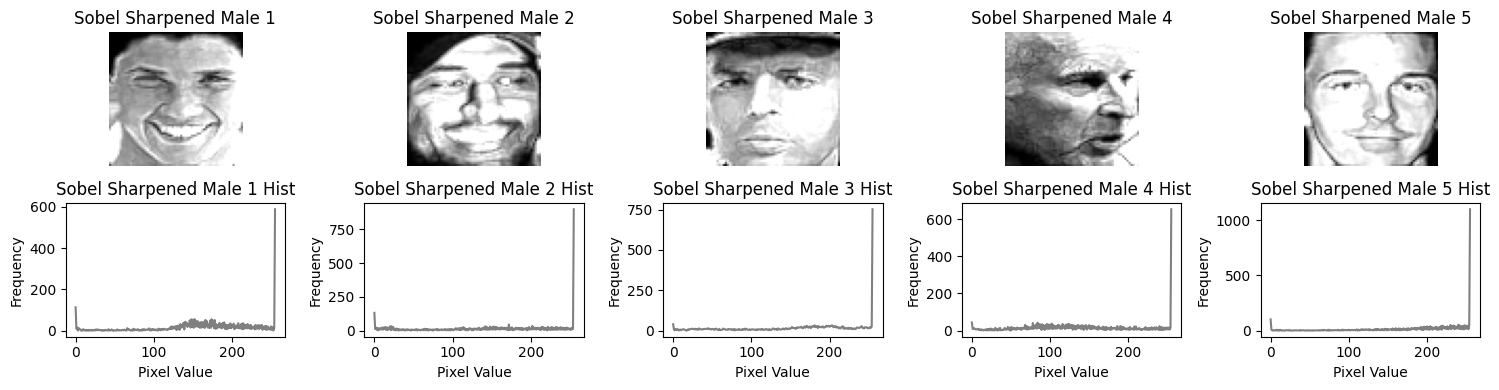

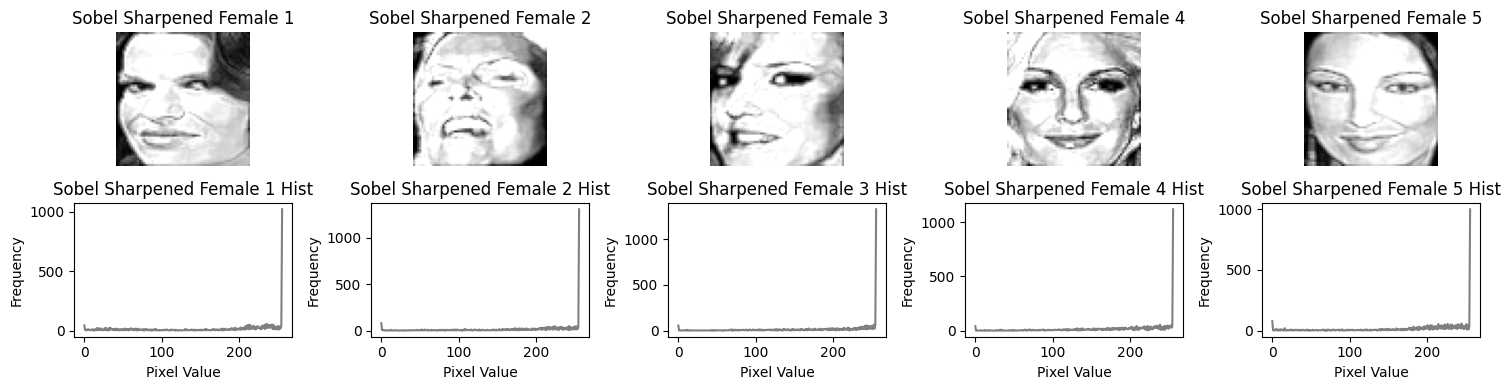

In [28]:
# Function to plot first five images and their histograms
def plot_images_and_histograms(images, title):
    plt.figure(figsize=(15, 4))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'{title} {i+1}')
        plt.axis('off')

        plt.subplot(2, 5, i + 6)
        hist_data = cv2.calcHist([images[i]], [0], None, [256], [0, 256])
        plt.plot(hist_data, color='gray')
        plt.title(f'{title} {i+1} Hist')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot first five Sobel-sharpened male images and their histograms
plot_images_and_histograms(perc_sobel_male, 'Sobel Sharpened Male')

# Plot first five Sobel-sharpened female images and their histograms
plot_images_and_histograms(perc_sobel_female, 'Sobel Sharpened Female')

In [29]:
## Applying Histogram based image enhancement

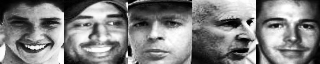

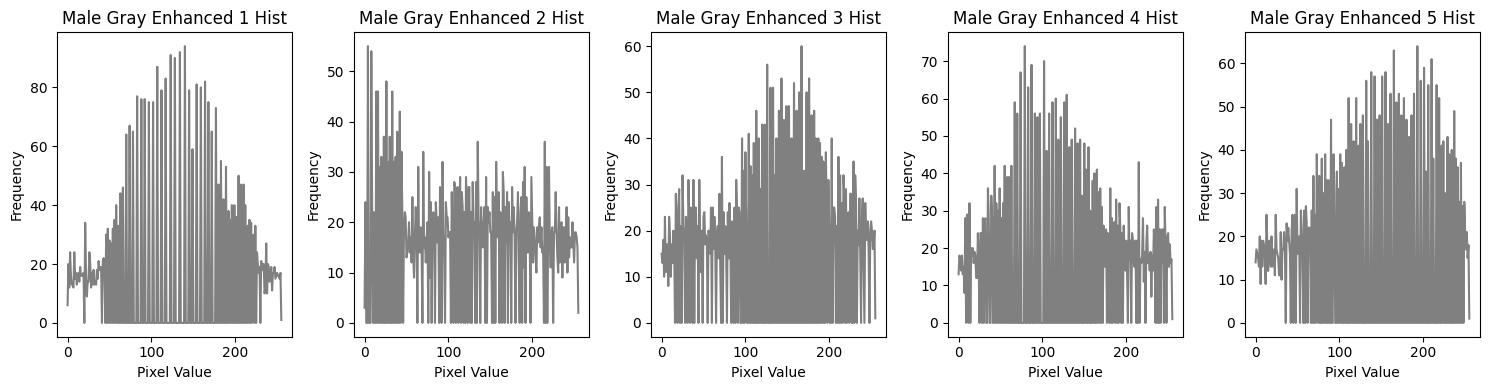

In [30]:
# Function for histogram equalization
def histogram_equalization(image):
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Calculate the CDF
    cdf = hist.cumsum()

    # Normalize the CDF
    nor_cdf = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())

    # Map the image using normalized CDF
    equalized = nor_cdf[image]

    # Convert the equalized image to uint8 data type
    equalized_image = equalized.astype(np.uint8)

    return equalized_image

# Create lists to store histogram-based images
male_hist = []
female_hist = []

# Assuming gray_male is a list containing 32x32 pixel grayscale images
# Apply histogram equalization on male gray images
for i in gray_male:
    male_eq = histogram_equalization(i)
    male_hist.append(male_eq)

# Display the combined images after histogram equalization
h_male_images = cv2.hconcat(male_hist[:5])
cv2_imshow( h_male_images)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot histograms for the first 5 enhanced images
plt.figure(figsize=(15, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    hist_data = cv2.calcHist([male_hist[i]], [0], None, [256], [0, 256])  # Corrected the input argument
    plt.plot(hist_data, color='gray')
    plt.title(f'Male Gray Enhanced {i+1} Hist')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

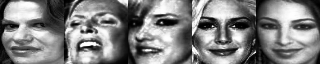

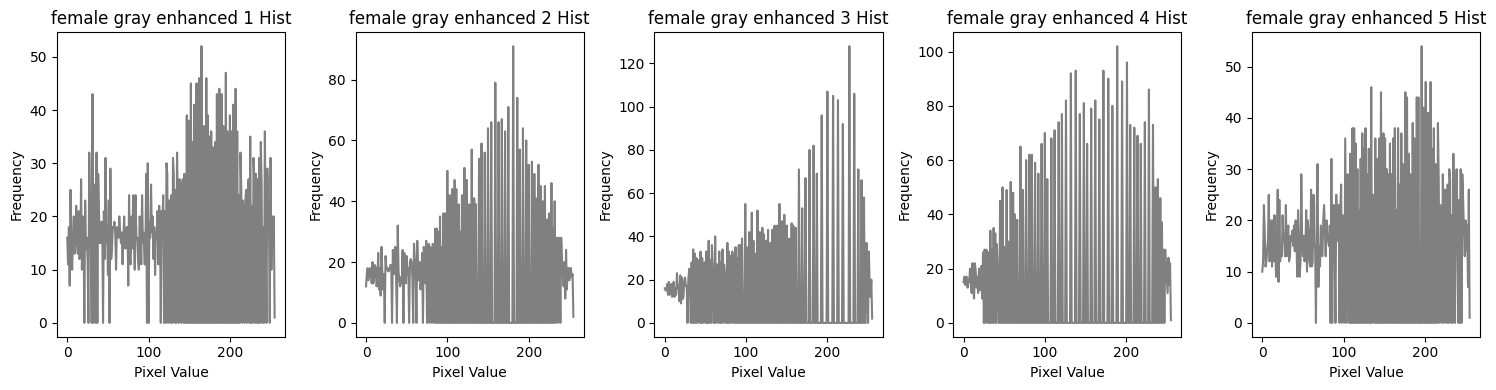

In [31]:
## apply histogram based on female gray images
for i in gray_female:
  female_eq= histogram_equalization(i)
  female_hist.append(female_eq)

# Display the combined images after histogram equalization
h_female_images = cv2.hconcat(female_hist[:5])
cv2_imshow(h_female_images)

# Plot histograms for the first 5 enhanced images
plt.figure(figsize=(15, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    hist_data = cv2.calcHist([female_hist[i]], [0], None, [256], [0, 256])  # Corrected the input argument
    plt.plot(hist_data, color='gray')
    plt.title(f'female gray enhanced {i+1} Hist')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [32]:
# Function for Sobel sharpening
def sobel_sharpening(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5, cv2.convertScaleAbs(sobel_y), 0.5, 0)
    sharpened_image = cv2.addWeighted(image, 1, sobel_combined, 0.5, 0)
    return sharpened_image

In [33]:
hist_sobel_male=[]
hist_sobel_female=[]
for i in male_hist:

   sharpened_male = sobel_sharpening(i)
   hist_sobel_male.append(sharpened_male)


for i in female_hist:
   sharpened_female = sobel_sharpening(i)
   hist_sobel_female.append(sharpened_female)

In [34]:
len(hist_sobel_male)

2498

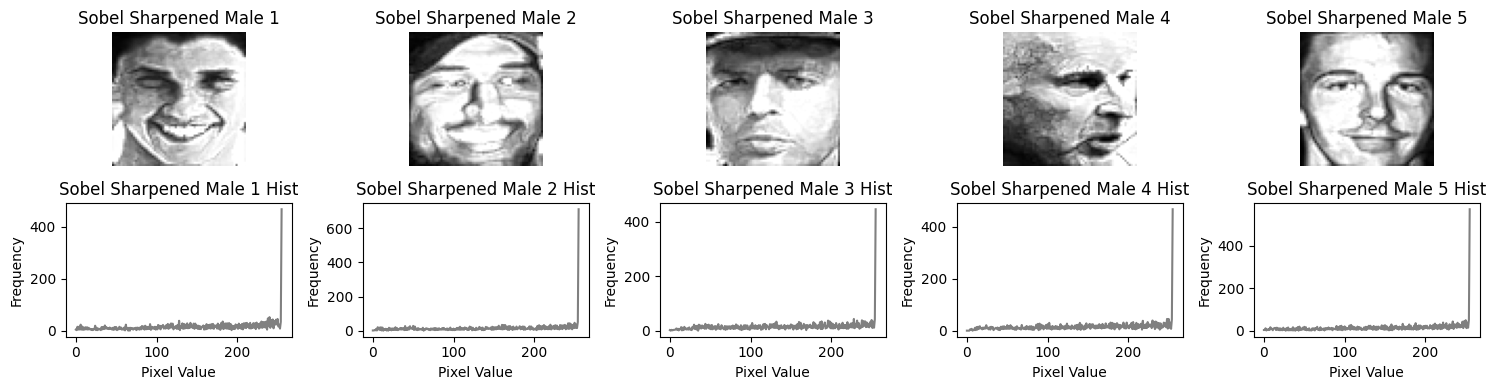

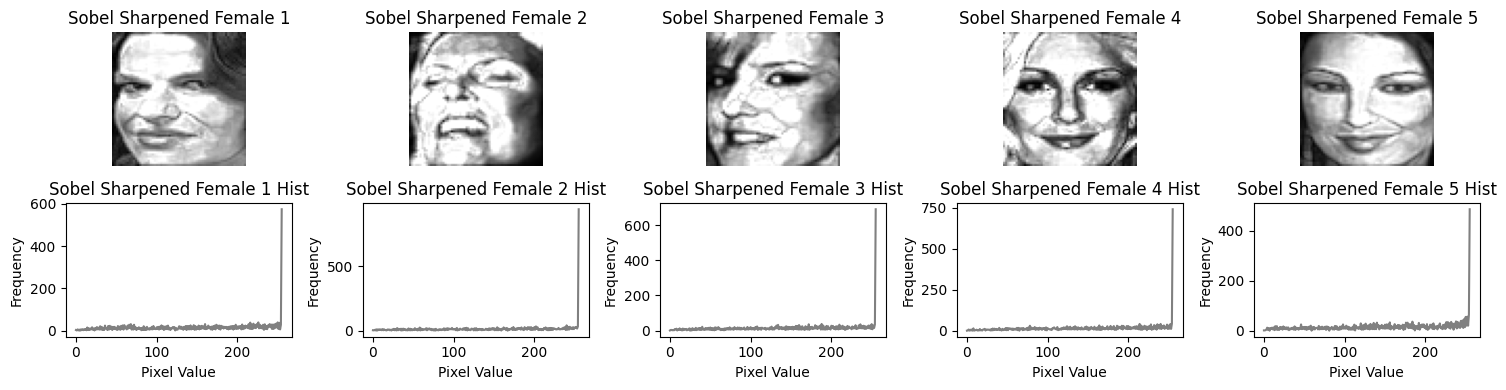

In [35]:
# Function to plot first five images and their histograms
def plot_images_and_histograms(images, title):
    plt.figure(figsize=(15, 4))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'{title} {i+1}')
        plt.axis('off')

        plt.subplot(2, 5, i + 6)
        hist_data = cv2.calcHist([images[i]], [0], None, [256], [0, 256])
        plt.plot(hist_data, color='gray')
        plt.title(f'{title} {i+1} Hist')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot first five Sobel-sharpened male images and their histograms
plot_images_and_histograms(hist_sobel_male, 'Sobel Sharpened Male')

# Plot first five Sobel-sharpened female images and their histograms
plot_images_and_histograms(hist_sobel_female, 'Sobel Sharpened Female')

In [36]:
## Gamma Correcation


In [37]:
## Define a function for gamma correction
# Function for gamma correction
def gamma_correction(image, gamma):
    corrected_image = np.power(image, gamma)
    corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)
    return corrected_image


In [38]:
## create list to store gamma-corrected images
gamma_corrected_male=[]
gamma_corrected_female=[]

In [39]:

for i in gray_male:
    gamma_corrected = gamma_correction(i, gamma=1.08)  # You can adjust the gamma value
    gamma_corrected_male.append(gamma_corrected)

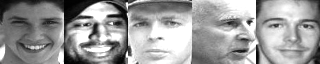

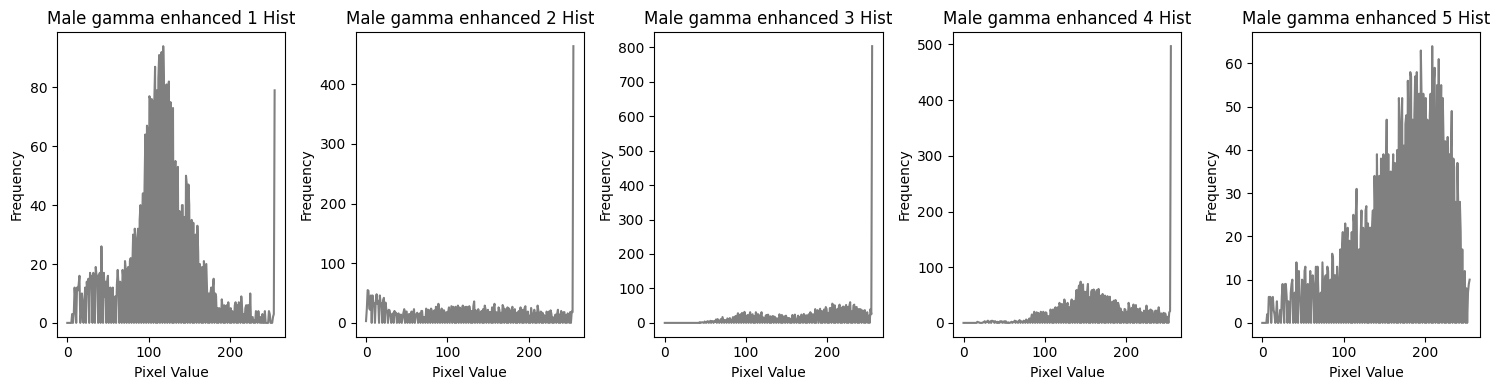

In [40]:
# Display the combined images after gamma correction
h_gamma_images = cv2.hconcat(gamma_corrected_male[:5])
cv2_imshow( h_gamma_images)


# Plot histograms for the first 5 enhanced images after gamma correction
plt.figure(figsize=(15, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    hist_data = cv2.calcHist([gamma_corrected_male[i]], [0], None, [256], [0, 256])
    plt.plot(hist_data, color='gray')
    plt.title(f'Male gamma enhanced {i+1} Hist')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [41]:

for i in gray_female:
    gamma_corrected = gamma_correction(i, gamma=1.08)
    gamma_corrected_female.append(gamma_corrected)

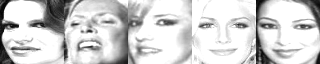

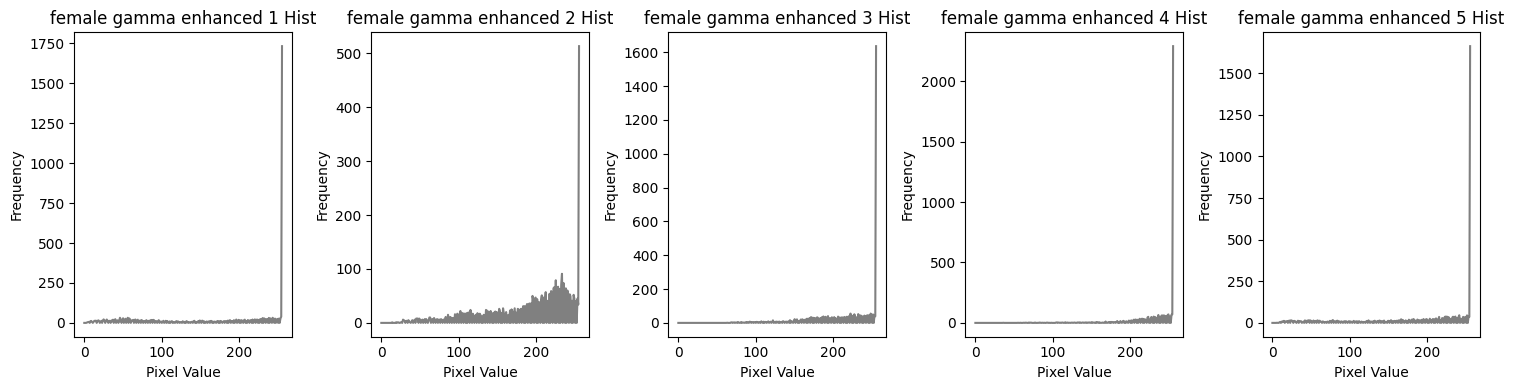

In [42]:
# Display the combined images after gamma correction
h_gamma_images = cv2.hconcat(gamma_corrected_female[:5])
cv2_imshow( h_gamma_images)


# Plot histograms for the first 5 enhanced images after gamma correction
plt.figure(figsize=(15, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    hist_data = cv2.calcHist([gamma_corrected_female[i]], [0], None, [256], [0, 256])
    plt.plot(hist_data, color='gray')
    plt.title(f'female gamma enhanced {i+1} Hist')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
from skimage import data, color, transform
import cv2

In [44]:
# Function to display images
def show_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

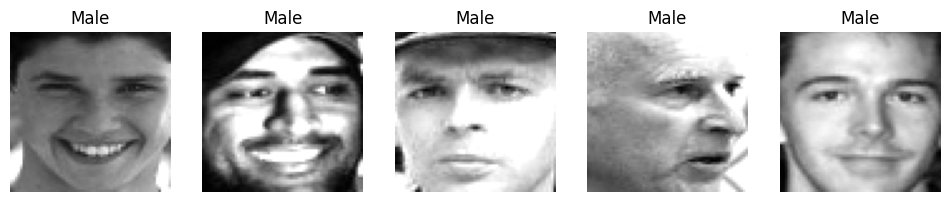

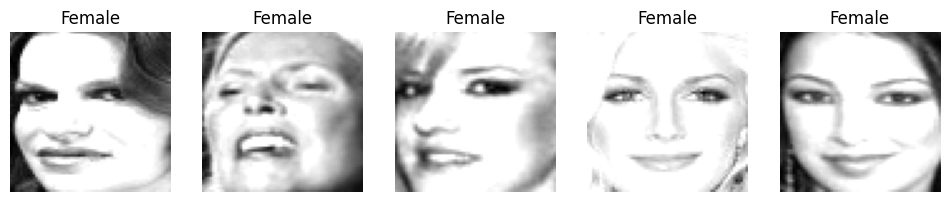

In [45]:
# Displaying the original images before feature extraction
show_images(gamma_corrected_male[:5], ['Male' for _ in range(5)])
show_images(gamma_corrected_female[:5], ['Female' for _ in range(5)])


In [46]:
# Function for Sobel sharpening
def sobel_sharpening(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5, cv2.convertScaleAbs(sobel_y), 0.5, 0)
    sharpened_image = cv2.addWeighted(image, 1, sobel_combined, 0.5, 0)
    return sharpened_image

In [47]:
gamma_sobel_male=[]
gamma_sobel_female=[]
for i in gamma_corrected_male:

   sharpened_male = sobel_sharpening(i)
   gamma_sobel_male.append(sharpened_male)


for i in gamma_corrected_female:
   sharpened_female = sobel_sharpening(i)
   gamma_sobel_female.append(sharpened_female)

In [48]:
len(gamma_sobel_male)

2498

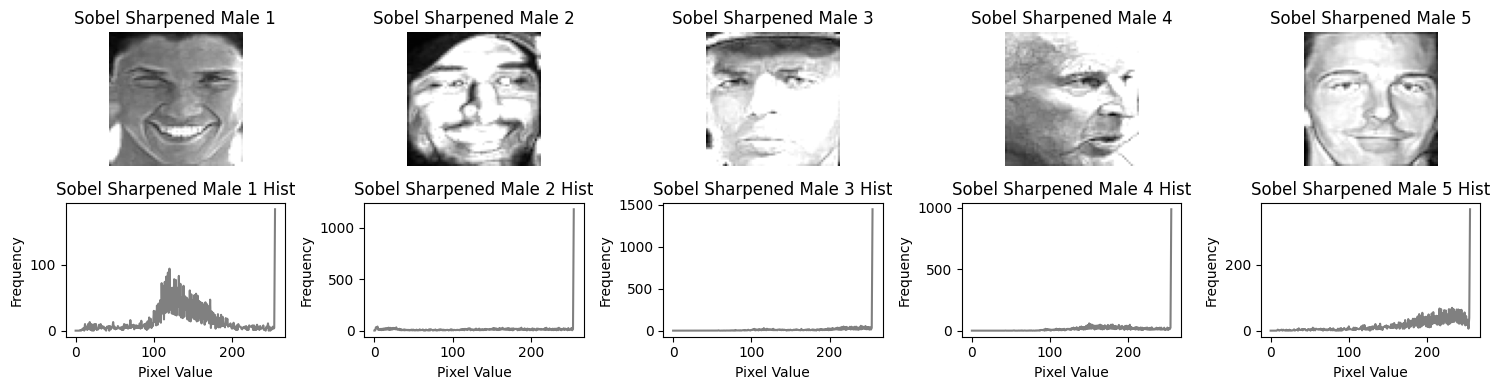

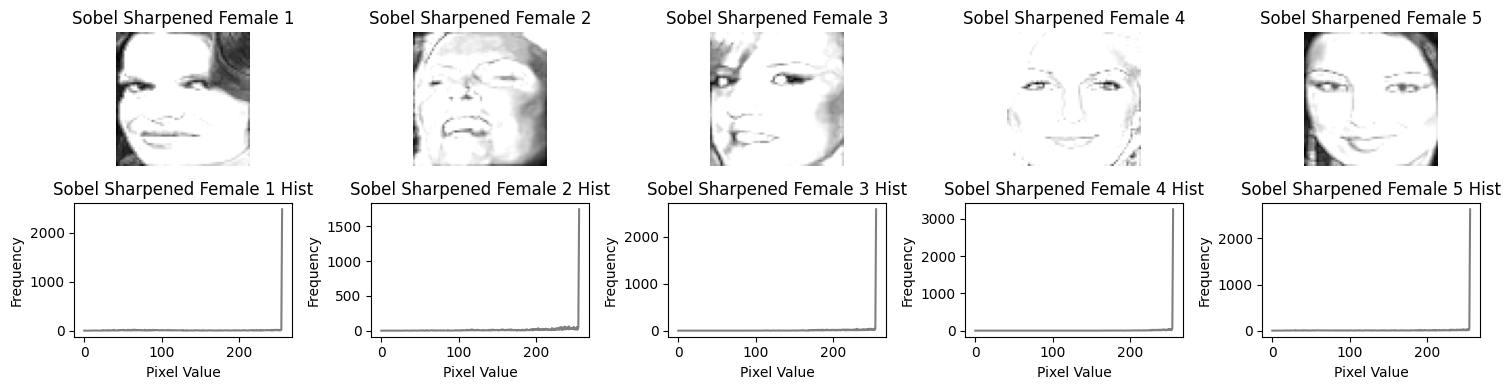

In [49]:
# Function to plot first five images and their histograms
def plot_images_and_histograms(images, title):
    plt.figure(figsize=(15, 4))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'{title} {i+1}')
        plt.axis('off')

        plt.subplot(2, 5, i + 6)
        hist_data = cv2.calcHist([images[i]], [0], None, [256], [0, 256])
        plt.plot(hist_data, color='gray')
        plt.title(f'{title} {i+1} Hist')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot first five Sobel-sharpened male images and their histograms
plot_images_and_histograms(gamma_sobel_male, 'Sobel Sharpened Male')

# Plot first five Sobel-sharpened female images and their histograms
plot_images_and_histograms(gamma_sobel_female, 'Sobel Sharpened Female')

In [50]:
## Choosing histogram histogrm based enhanced and sharpened image for feature extraction

In [51]:
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2


In [52]:
# Function to compute HOG features and visualize the effect
def compute_and_visualize_hog(image):
    # Compute HOG features
    hog_features, hog_image = hog(image, visualize=True, pixels_per_cell=(8, 8), cells_per_block=(2, 2))

    # Print the HOG features (you can comment this line if the output is too lengthy)
    print("HOG Features:")
    print(hog_features)

    # Display the original image and HOG visualization
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Input Image')

    # Rescale histogram for better display
    hog_image_rescaled = cv2.resize(hog_image, (image.shape[1], image.shape[0]))

    ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax[1].set_title('HOG Visualization')
    plt.show()


HOG visualization for Male images:
HOG Features:
[0.06385357 0.06281937 0.05756198 ... 0.05137307 0.03866659 0.01944601]


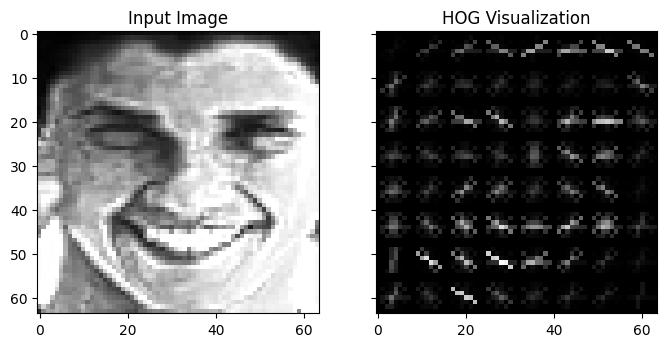

HOG Features:
[0.04689226 0.11525743 0.10916202 ... 0.06782436 0.15425098 0.15466697]


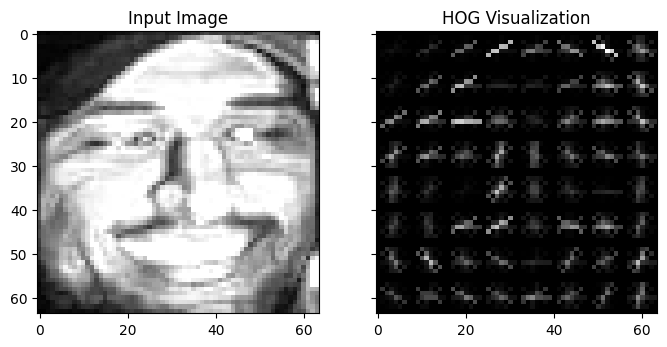

HOG Features:
[0.13631856 0.0981639  0.37095696 ... 0.         0.08873561 0.09135934]


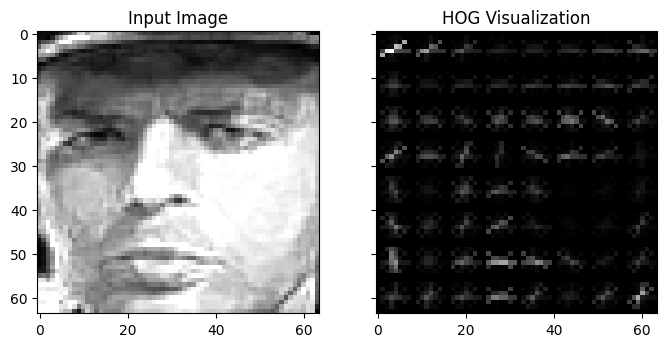

HOG Features:
[0.22188067 0.07811909 0.13063632 ... 0.30203503 0.00394384 0.00283065]


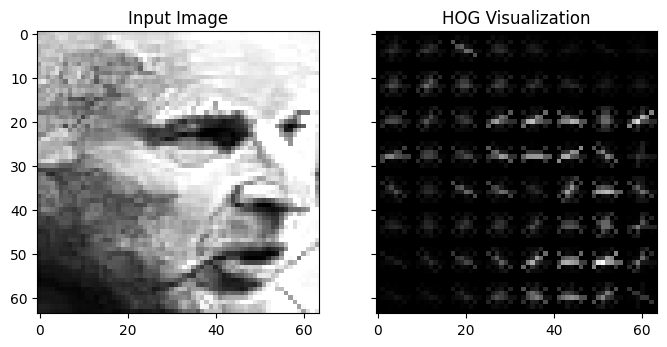

HOG Features:
[0.3071467  0.23456872 0.19315269 ... 0.02058928 0.06097968 0.15751223]


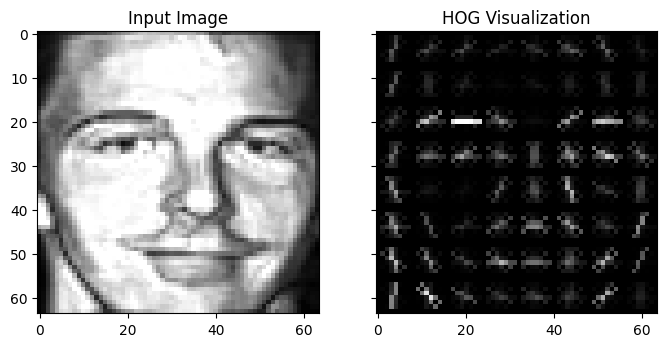

HOG visualization for Female images:
HOG Features:
[0.12752921 0.38381792 0.38381792 ... 0.05892114 0.06121873 0.02440555]


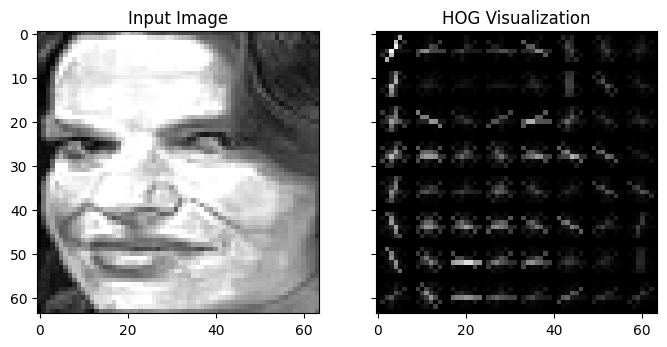

HOG Features:
[0.19030983 0.2914089  0.17851088 ... 0.         0.         0.        ]


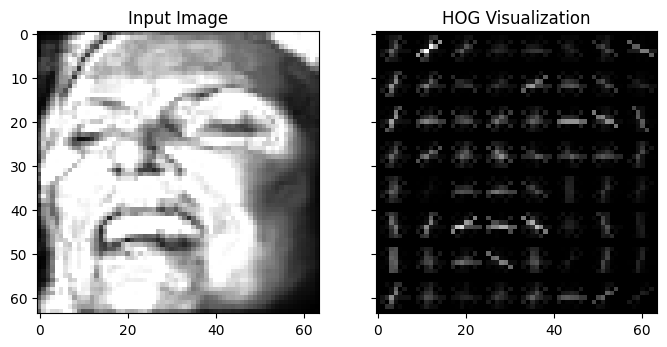

HOG Features:
[0.27085562 0.03650564 0.08027591 ... 0.00337224 0.12948499 0.03649818]


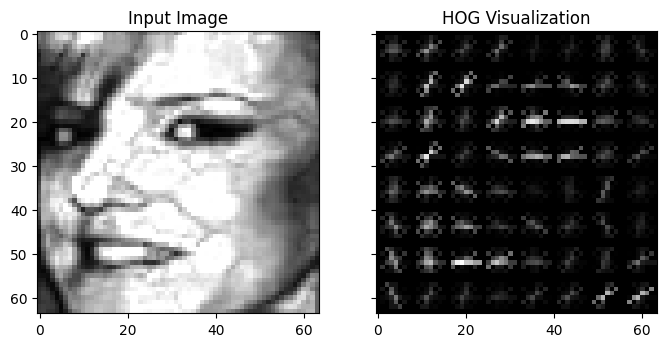

HOG Features:
[0.29115519 0.14046694 0.29115519 ... 0.00500774 0.01713968 0.03215712]


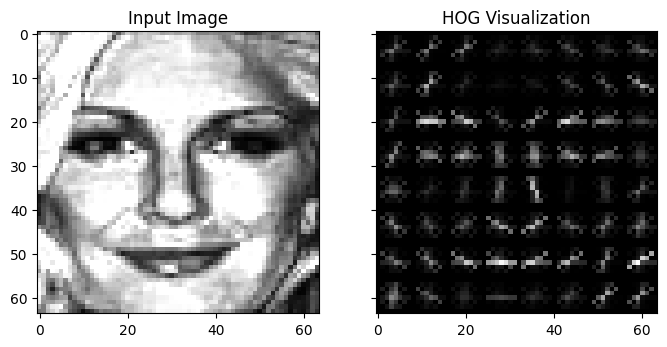

HOG Features:
[0.15941881 0.28770423 0.28770423 ... 0.02126807 0.         0.0280822 ]


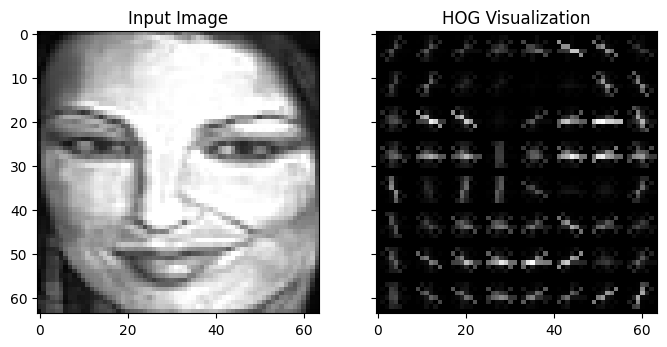

In [53]:
# Apply HOG feature extraction and visualization to the first five male images
print("HOG visualization for Male images:")
for i in range(5):
    compute_and_visualize_hog(hist_sobel_male[i])

# Apply HOG feature extraction and visualization to the first five female images
print("HOG visualization for Female images:")
for i in range(5):
    compute_and_visualize_hog(hist_sobel_female[i])

In [54]:
# Function to compute HOG features
def compute_hog_features(image):
    hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    return hog_features

# Assuming you have the lists gamma_corrected_male and gamma_corrected_female containing images

# Extract HOG features for male images
hog_male_features = [compute_hog_features(img) for img in hist_sobel_male]

# Extract HOG features for female images
hog_female_features = [compute_hog_features(img) for img in hist_sobel_female]

In [55]:
## Apply lbp for hist images

In [56]:
# Function to compute LBP features and visualize the effect
def compute_and_visualize_lbp(image):
    # Compute LBP features
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')

    # Print the LBP values (you can comment this line if the output is too lengthy)
    print("LBP Values:")
    print(lbp)

    # Display the original image and LBP visualization
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Input Image')

    ax[1].imshow(lbp, cmap='gray')
    ax[1].set_title('LBP Visualization')
    plt.show()

LBP visualization for Male images:
LBP Values:
[[ 7.  7.  8. ... 10.  6.  4.]
 [ 4.  8. 11. ...  9.  8.  6.]
 [ 5.  0.  0. ... 11. 10.  9.]
 ...
 [ 3.  3.  4. ...  9.  8.  9.]
 [25.  4.  6. ...  8.  7.  6.]
 [ 8.  8.  5. ... 25.  5.  5.]]


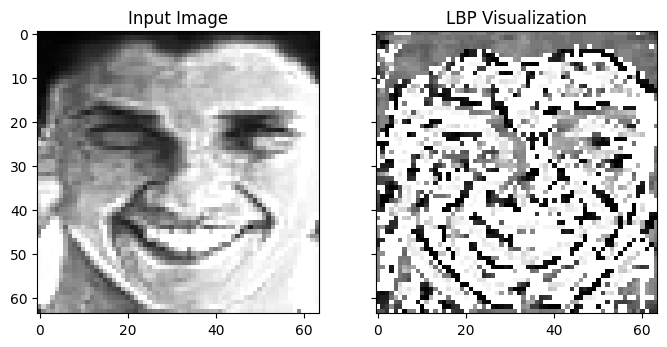

LBP Values:
[[ 7.  6. 13. ... 11.  9.  8.]
 [ 0.  0.  0. ...  9.  7.  6.]
 [ 0.  0.  1. ...  3.  2.  2.]
 ...
 [ 8. 10. 13. ...  2.  4.  6.]
 [ 7.  9. 10. ...  1.  0.  4.]
 [24. 10.  8. ...  2.  0.  2.]]


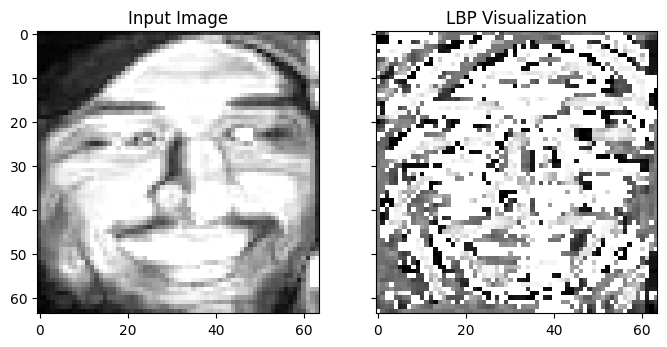

LBP Values:
[[ 7.  9. 11. ... 25. 10.  9.]
 [ 8. 10. 14. ...  2.  0.  0.]
 [ 8. 10. 11. ...  3.  1.  1.]
 ...
 [ 6.  6.  0. ... 25.  5. 11.]
 [25. 25.  1. ... 25. 25.  9.]
 [25. 25. 25. ...  1. 25.  9.]]


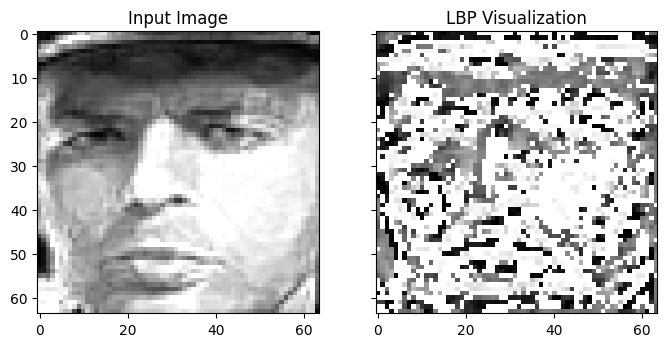

LBP Values:
[[ 6.  7.  6. ...  9.  8.  7.]
 [25. 25. 25. ...  8.  7.  5.]
 [ 0. 25. 25. ... 25.  8. 25.]
 ...
 [ 3.  0.  0. ...  2.  4.  3.]
 [ 0.  0.  0. ... 25.  5.  3.]
 [ 0.  0.  0. ... 25.  5.  6.]]


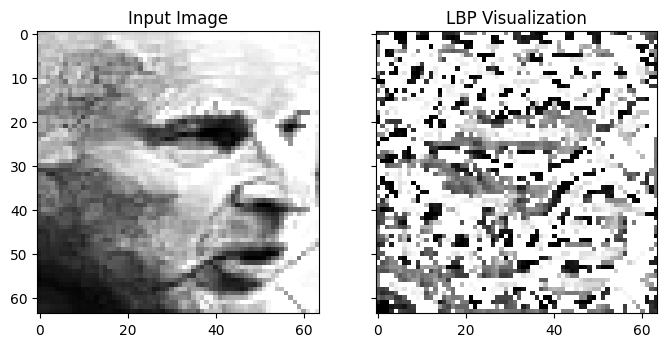

LBP Values:
[[ 6.  7.  9. ...  9.  6.  7.]
 [ 8.  9.  9. ...  8.  7.  8.]
 [10. 11. 12. ...  9.  8.  9.]
 ...
 [11. 10. 10. ... 25. 25.  0.]
 [ 9.  8.  8. ... 13. 25.  4.]
 [ 8.  7.  6. ... 12. 10.  8.]]


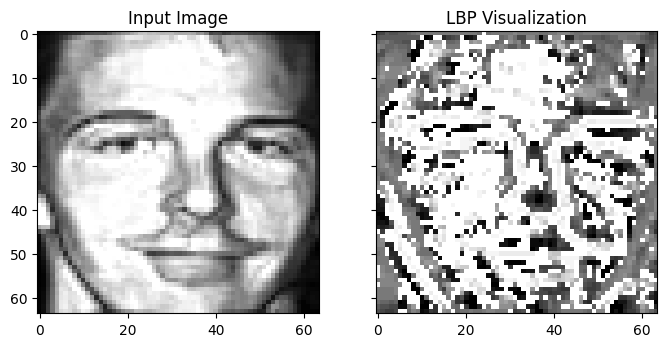

LBP visualization for Female images:
LBP Values:
[[ 5.  4. 10. ...  4.  6.  7.]
 [ 7.  8.  3. ... 25.  3. 25.]
 [ 8. 25.  2. ... 13. 25. 25.]
 ...
 [10. 25.  4. ...  0.  3.  3.]
 [ 9.  5.  4. ...  6.  2. 25.]
 [ 9. 25.  4. ... 25.  1.  7.]]


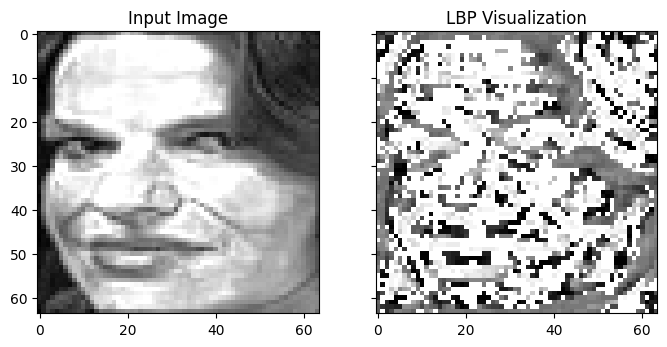

LBP Values:
[[24.  9. 10. ...  6.  6.  7.]
 [ 8.  8. 10. ... 25. 25.  8.]
 [ 9.  7.  8. ...  2. 25.  4.]
 ...
 [ 7.  5.  5. ... 11. 10.  9.]
 [ 6.  5.  3. ... 10. 11. 24.]
 [ 6.  5.  4. ... 10. 24.  7.]]


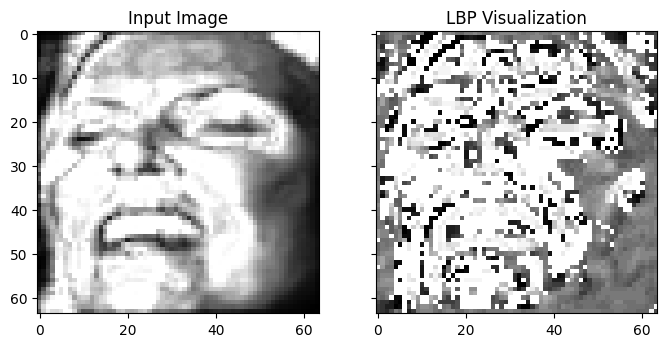

LBP Values:
[[ 4.  6.  6. ...  9.  8.  7.]
 [ 4.  6.  5. ... 25.  9.  8.]
 [ 6.  7.  6. ...  9.  7.  9.]
 ...
 [25.  0.  0. ...  9.  6.  9.]
 [25.  1.  1. ...  9.  6.  8.]
 [ 1.  0.  3. ... 25. 25.  7.]]


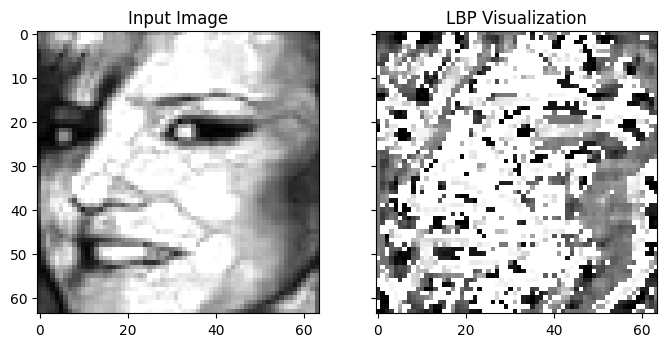

LBP Values:
[[ 7.  1. 25. ...  2.  2.  7.]
 [ 0.  0.  0. ...  3.  2. 25.]
 [25.  0.  0. ... 25. 25. 25.]
 ...
 [ 1. 25. 25. ...  3.  0.  0.]
 [25. 25. 25. ... 25.  1.  2.]
 [ 7.  8. 25. ...  3.  0.  3.]]


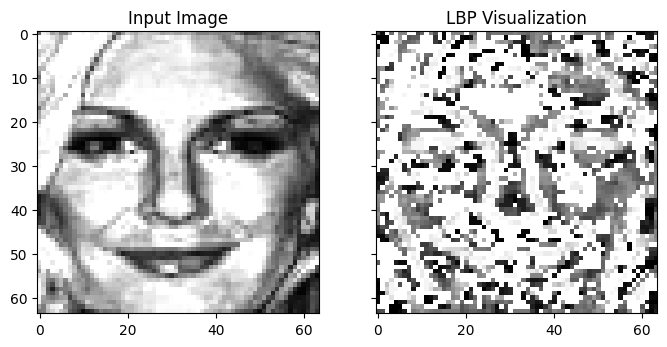

LBP Values:
[[24.  6. 25. ... 10.  0.  0.]
 [25. 25. 25. ...  7.  0.  0.]
 [10.  8. 11. ...  8.  7.  1.]
 ...
 [ 8.  9. 25. ... 11. 12. 10.]
 [ 6.  7. 25. ... 10. 10.  8.]
 [ 8.  6. 25. ...  9.  9.  8.]]


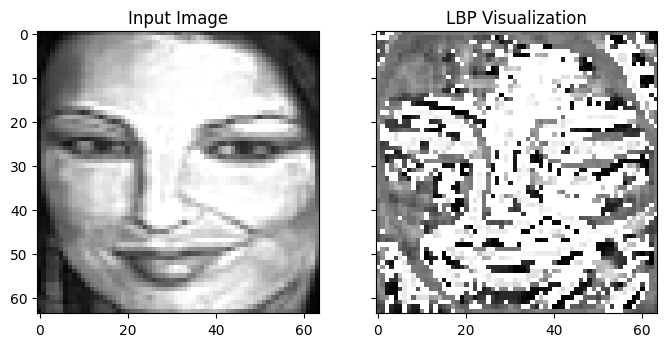

In [57]:
# Apply LBP feature extraction and visualization to the first five male images
print("LBP visualization for Male images:")
for i in range(5):
    compute_and_visualize_lbp(hist_sobel_male[i])

# Apply LBP feature extraction and visualization to the first five female images
print("LBP visualization for Female images:")
for i in range(5):
    compute_and_visualize_lbp(hist_sobel_female[i])

In [58]:
# Function to compute LBP features
def compute_lbp_features(image):
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    return lbp.ravel()  # Flatten the LBP array to use as features

# Assuming you have the lists gamma_corrected_male and gamma_corrected_female containing images

# Extract LBP features for male images
lbp_male_features = [compute_lbp_features(img) for img in hist_sobel_male]

# Extract LBP features for female images
lbp_female_features = [compute_lbp_features(img) for img in hist_sobel_female]

In [59]:
import pandas as pd

# Assuming you have all these feature lists already computed

# Creating DataFrames for each feature
lbp_male_df = pd.DataFrame(lbp_male_features, columns=[f"LBP_{i}" for i in range(len(lbp_male_features[0]))])
lbp_female_df = pd.DataFrame(lbp_female_features, columns=[f"LBP_{i}" for i in range(len(lbp_female_features[0]))])





In [60]:
hog_male_df = pd.DataFrame(hog_male_features, columns=[f"HOG_{i}" for i in range(len(hog_male_features[0]))])
hog_female_df = pd.DataFrame(hog_female_features, columns=[f"HOG_{i}" for i in range(len(hog_female_features[0]))])


In [61]:
# Adding Gender column
lbp_male_df['Gender'] = 0
lbp_female_df['Gender'] = 1





# Concatenating all the DataFrames
male_df = pd.concat([lbp_male_df, hog_male_df], axis=1)
female_df = pd.concat([lbp_female_df, hog_female_df], axis=1)


# Concatenating male and female DataFrames
all_data = pd.concat([male_df, female_df], ignore_index=True)

# Shuffle the data
all_data = all_data.sample(frac=1).reset_index(drop=True)
# Assuming the duplicate 'gender' columns are the first and second columns
all_data.drop(all_data.columns[1], axis=1, inplace=True)
all_data

LBP_0  LBP_2  LBP_3  LBP_4  LBP_5  LBP_6  LBP_7  LBP_8  LBP_9  LBP_10  \
0       7.0    5.0   25.0   25.0   25.0   13.0   10.0   11.0   11.0    12.0   
1       7.0   25.0    4.0    5.0    6.0   25.0   25.0   25.0   11.0    25.0   
2       7.0    0.0   25.0   13.0   13.0   25.0   10.0   10.0   12.0    12.0   
3       6.0    8.0   13.0   25.0   13.0   25.0    0.0   25.0   11.0    13.0   
4       0.0    0.0    3.0   12.0   13.0   13.0   13.0    9.0   11.0    11.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
4993    2.0    1.0   25.0   13.0   25.0    5.0   25.0    6.0    0.0     5.0   
4994    4.0    8.0   25.0    9.0    9.0   11.0   12.0   11.0   11.0    11.0   
4995    7.0    9.0    9.0   25.0    7.0    8.0    8.0    9.0   10.0    11.0   
4996    1.0    0.0    5.0   25.0    6.0    4.0   25.0   25.0   25.0    10.0   
4997    7.0   11.0   14.0   10.0    9.0   10.0   11.0   12.0   10.0    11.0   

      ...  HOG_1754  HOG_1755  HOG_1756  HOG_1757  HOG_1758  HOG_1759  \
0     ...  0.000000  0.283334  0.287632  0.179149  0.061796  0.198820   
1     ...  0.013243  0.298856  0.000000  0.086584  0.033535  0.227046   
2     ...  0.065767  0.032359  0.042790  0.209706  0.020688  0.031613   
3     ...  0.140292  0.327599  0.119969  0.011272  0.002508  0.121909   
4     ...  0.020366  0.337137  0.337137  0.113974  0.020127  0.024347   
...   ...       ...       ...       ...       ...       ...       ...   
4993  ...  0.018148  0.040817  0.197653  0.186859  0.053555  0.052718   
4994  ...  0.037348  0.085615  0.057460  0.016992  0.018688  0.066527   
4995  ...  0.123349  0.261974  0.058181  0.030355  0.014235  0.030733   
4996  ...  0.005721  0.060037  0.021149  0.041368  0.048731  0.062080   
4997  ...  0.165663  0.066614  0.048728  0.132761  0.031626  0.072258   

      HOG_1760  HOG_1761  HOG_1762  HOG_1763  
0     0.048670  0.092366  0.080192  0.023007  
1     0.263422  0.298856  0.000000  0.298856  
2     0.018311  0.025486  0.025801  0.002715  
3     0.014755  0.013459  0.109443  0.327599  
4     0.047796  0.029507  0.060798  0.049563  
...        ...       ...       ...       ...  
4993  0.032611  0.027735  0.003467  0.000000  
4994  0.055600  0.037236  0.024595  0.039470  
4995  0.000000  0.036513  0.047736  0.145782  
4996  0.018568  0.020217  0.030616  0.013705  
4997  0.020512  0.017771  0.033452  0.012774  

[4998 rows x 5860 columns]

In [62]:
## Let's start the modeling process

In [63]:
## Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.preprocessing import StandardScaler




In [64]:
# Extracting features (X) and labels (y)
X = all_data.drop('Gender', axis=1)  # Assuming 'Gender' is the label column
y = all_data['Gender']

# Displaying shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (4998, 5859)
Shape of y: (4998,)


In [65]:
y

0       1
1       0
2       0
3       1
4       1
       ..
4993    1
4994    1
4995    1
4996    1
4997    1
Name: Gender, Length: 4998, dtype: int64

In [66]:
## Normalizing the data just to see if any difference in accuracy
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Splitting the data into training and testing sets (assuming X and y are defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [68]:
# Initializing the SVM classifier
svm_classifier = SVC()



In [69]:
# Fitting the model on the training data
svm_classifier.fit(X_train, y_train)



SVC()

In [70]:
y_pred = svm_classifier.predict(X_test)



In [71]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       508
           1       0.75      0.72      0.73       492

    accuracy                           0.74      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000



In [72]:
import xgboost as xgb
from sklearn.model_selection import train_test_split





# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
# Predict labels for the test set
y_pred1 = xgb_model.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.889


In [75]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       508
           1       0.89      0.88      0.89       492

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [76]:
import lightgbm as lgb

# Initialize LGBM classifier
lgb_model = lgb.LGBMClassifier()

# Train the LGBM model
lgb_model.fit(X_train, y_train)

# Predict labels for the test set using LGBM
y_pred_lgbm = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 2008, number of negative: 1990
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.255664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 551824
[LightGBM] [Info] Number of data points in the train set: 3998, number of used features: 5859
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502251 -> initscore=0.009005
[LightGBM] [Info] Start training from score 0.009005


In [77]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.886


In [78]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       508
           1       0.89      0.88      0.88       492

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [79]:
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2


In [80]:
# Function to compute HOG features and visualize the effect
def compute_and_visualize_hog(image):
    # Compute HOG features
    hog_features, hog_image = hog(image, visualize=True, pixels_per_cell=(8, 8), cells_per_block=(2, 2))

    # Print the HOG features (you can comment this line if the output is too lengthy)
    print("HOG Features:")
    print(hog_features)

    # Display the original image and HOG visualization
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Input Image')

    # Rescale histogram for better display
    hog_image_rescaled = cv2.resize(hog_image, (image.shape[1], image.shape[0]))

    ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax[1].set_title('HOG Visualization')
    plt.show()


HOG visualization for Male images:
HOG Features:
[0.00336084 0.06796015 0.00092775 ... 0.00753794 0.         0.        ]


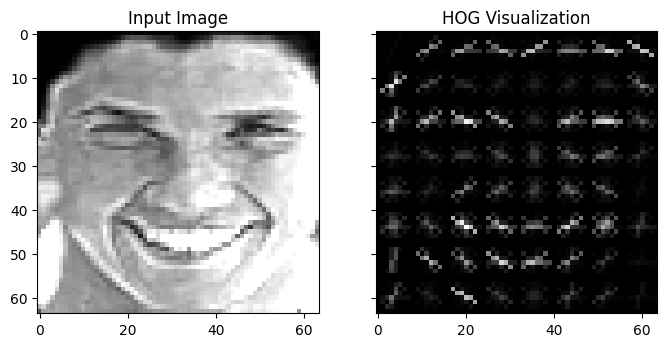

HOG Features:
[0.02871501 0.01390105 0.00460184 ... 0.04568064 0.08527062 0.27629821]


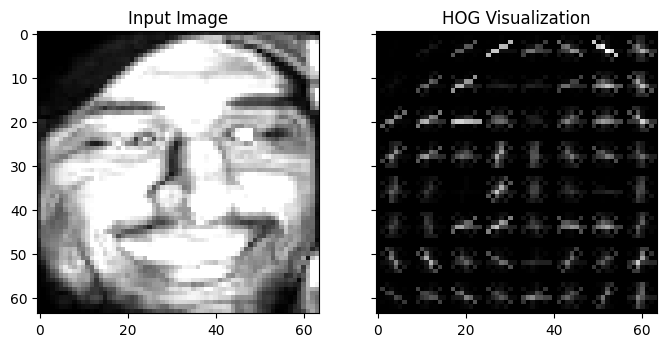

HOG Features:
[0.08382647 0.10953749 0.35727321 ... 0.         0.1223593  0.08729276]


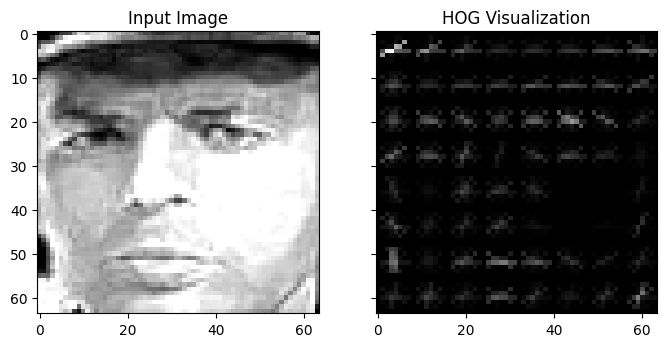

HOG Features:
[0.22854576 0.15103465 0.12077401 ... 0.27914397 0.         0.        ]


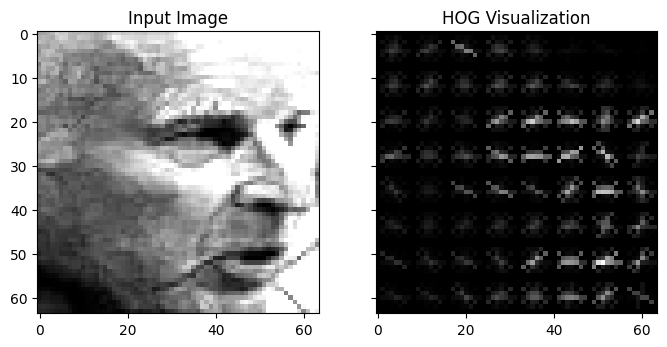

HOG Features:
[0.38632358 0.38632358 0.06559057 ... 0.         0.00689993 0.31389384]


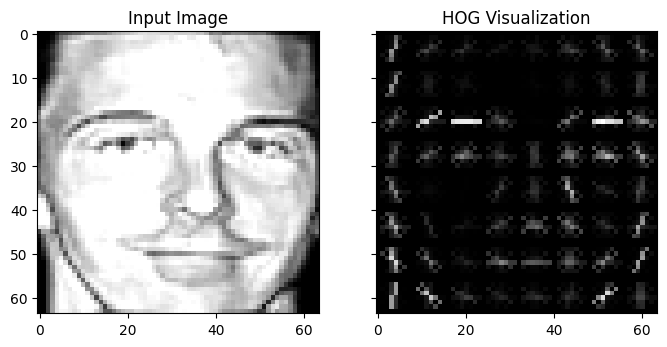

HOG visualization for Female images:
HOG Features:
[0.30318647 0.41781906 0.41781906 ... 0.04718173 0.0238377  0.04819419]


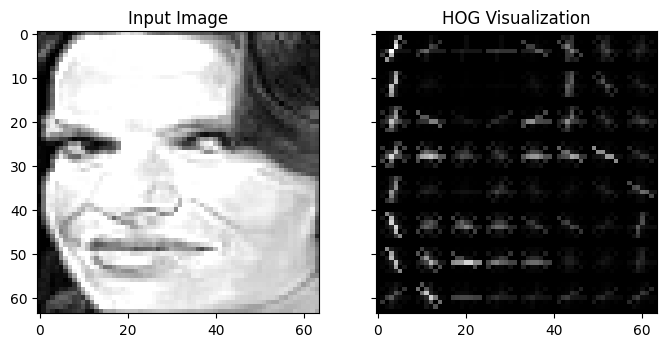

HOG Features:
[0.20332853 0.28202598 0.28202598 ... 0.         0.         0.01330982]


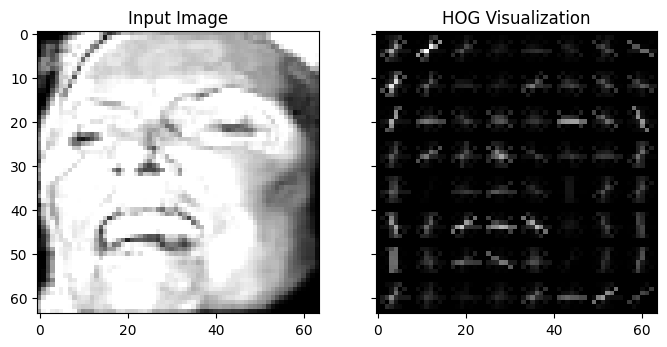

HOG Features:
[0.26069854 0.02658331 0.15106508 ... 0.00210399 0.04867627 0.10348613]


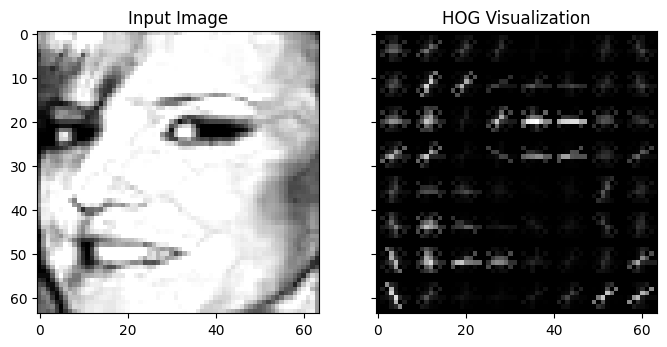

HOG Features:
[0.26715665 0.16359641 0.26715665 ... 0.01662745 0.00542819 0.0851872 ]


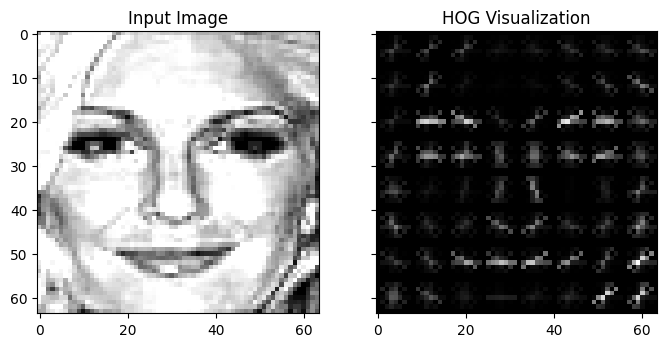

HOG Features:
[0.19522989 0.36253415 0.36253415 ... 0.04622056 0.         0.053421  ]


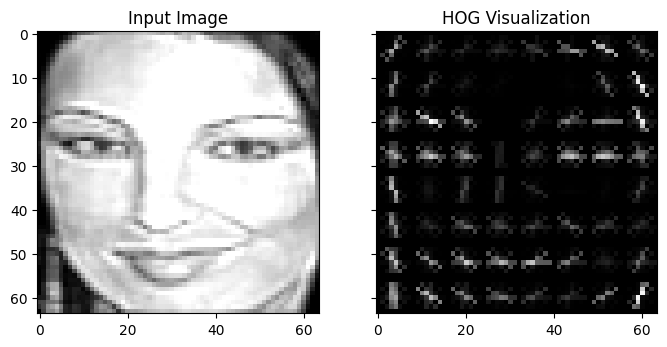

In [81]:
# Apply HOG feature extraction and visualization to the first five male images
print("HOG visualization for Male images:")
for i in range(5):
    compute_and_visualize_hog(perc_sobel_male[i])

# Apply HOG feature extraction and visualization to the first five female images
print("HOG visualization for Female images:")
for i in range(5):
    compute_and_visualize_hog(perc_sobel_female[i])

In [82]:
# Function to compute HOG features
def compute_hog_features(image):
    hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    return hog_features

# Assuming you have the lists gamma_corrected_male and gamma_corrected_female containing images

# Extract HOG features for male images
hog_male_features = [compute_hog_features(img) for img in perc_sobel_male]

# Extract HOG features for female images
hog_female_features = [compute_hog_features(img) for img in perc_sobel_female]

In [83]:
## Apply lbp for hist images

In [84]:
# Function to compute LBP features and visualize the effect
def compute_and_visualize_lbp(image):
    # Compute LBP features
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')

    # Print the LBP values (you can comment this line if the output is too lengthy)
    print("LBP Values:")
    print(lbp)

    # Display the original image and LBP visualization
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Input Image')

    ax[1].imshow(lbp, cmap='gray')
    ax[1].set_title('LBP Visualization')
    plt.show()

LBP visualization for Male images:
LBP Values:
[[24. 24. 24. ... 24.  5.  4.]
 [24. 24. 24. ... 10.  9.  6.]
 [24. 24. 24. ... 11. 11.  9.]
 ...
 [ 4.  4.  6. ... 10.  9.  9.]
 [ 5.  4.  6. ...  9.  8.  8.]
 [ 7. 25.  6. ... 25.  6.  7.]]


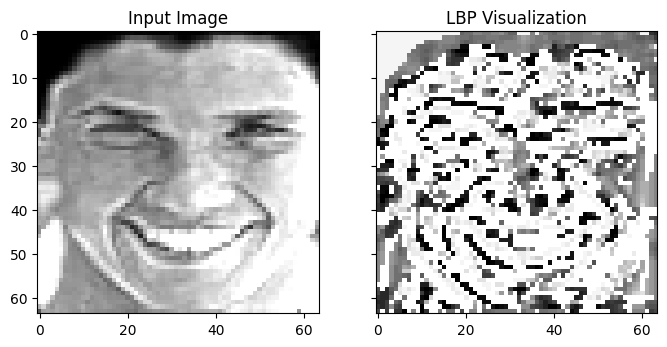

LBP Values:
[[24. 24. 24. ... 11.  9.  9.]
 [24. 24. 24. ... 11.  8.  6.]
 [24. 24. 24. ...  3.  2.  2.]
 ...
 [24. 24. 24. ...  2.  4. 25.]
 [24. 24. 24. ...  1.  1.  4.]
 [24. 24. 24. ...  2.  0.  2.]]


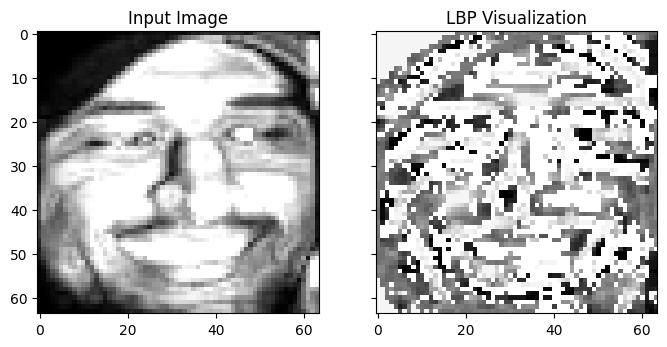

LBP Values:
[[24. 24. 24. ... 25. 10. 24.]
 [24. 24. 14. ...  1.  0.  0.]
 [ 8. 10. 12. ...  3.  2.  2.]
 ...
 [ 5. 25.  0. ... 25.  1. 10.]
 [ 8.  9.  5. ... 25.  1.  9.]
 [25. 25.  3. ...  1.  1. 24.]]


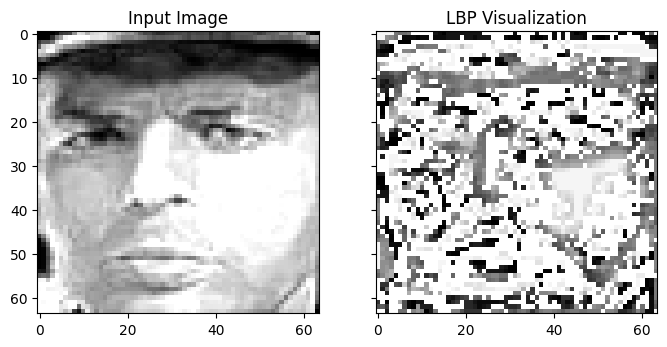

LBP Values:
[[ 6. 25.  6. ...  9.  8.  7.]
 [25. 25. 25. ... 25. 25.  8.]
 [ 0. 25. 25. ... 25. 25.  9.]
 ...
 [ 3.  0.  0. ...  6.  8.  7.]
 [ 0.  0.  0. ... 25.  6.  5.]
 [ 0.  0.  0. ... 10.  5.  5.]]


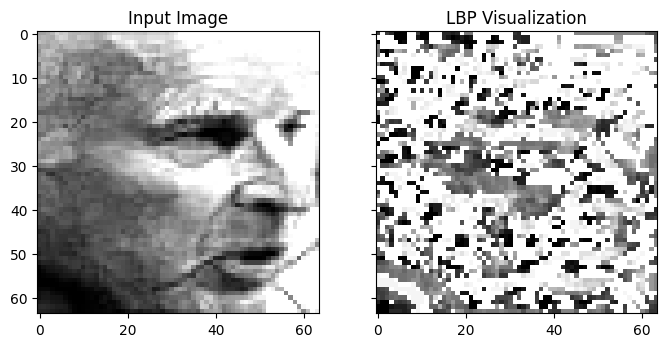

LBP Values:
[[24. 24. 24. ...  9.  7. 24.]
 [24. 24. 24. ...  8.  9. 24.]
 [24. 24. 13. ...  9.  9. 24.]
 ...
 [24. 24. 11. ... 24. 24. 24.]
 [24. 24.  9. ... 24. 24. 24.]
 [24. 24.  7. ... 24. 24. 24.]]


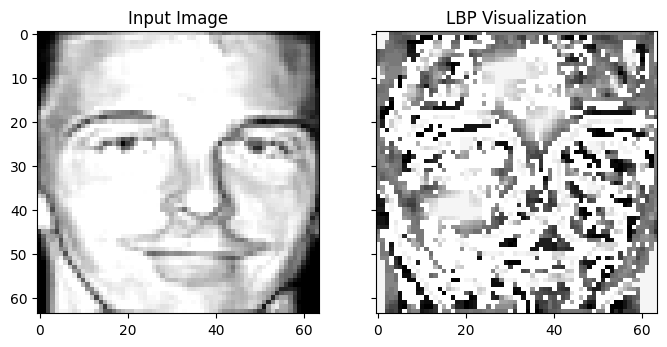

LBP visualization for Female images:
LBP Values:
[[ 6.  4. 11. ...  4.  5.  7.]
 [ 7.  8.  3. ... 25.  3. 25.]
 [ 8. 25.  2. ... 14. 25. 25.]
 ...
 [11. 25.  4. ... 25.  4.  3.]
 [24. 25.  4. ...  7.  3.  6.]
 [24. 25.  4. ... 25.  0.  7.]]


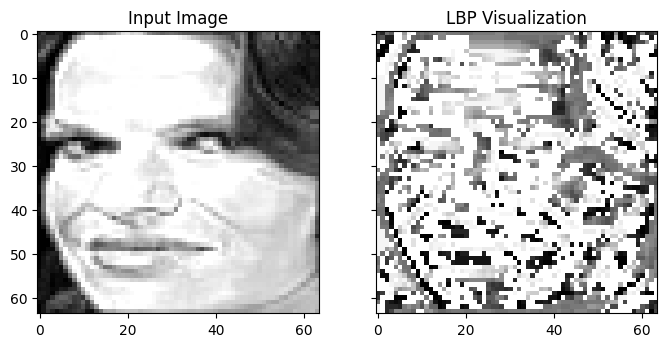

LBP Values:
[[24. 24. 24. ...  9.  8.  7.]
 [24. 24. 24. ... 10.  9.  8.]
 [24.  7.  8. ... 25. 25.  7.]
 ...
 [ 7.  3.  3. ... 24. 24. 24.]
 [ 6.  3.  3. ... 24. 24. 24.]
 [ 6.  5.  5. ... 24. 24. 24.]]


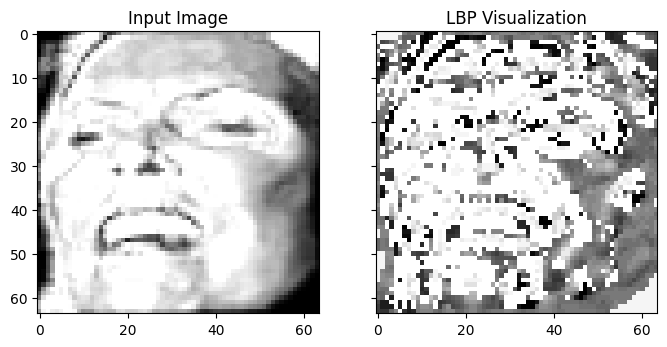

LBP Values:
[[ 5.  7.  6. ...  9.  8.  7.]
 [ 4.  6.  5. ... 25.  9.  8.]
 [ 5.  7.  6. ...  8.  6.  9.]
 ...
 [25.  2.  0. ...  9.  7.  9.]
 [25.  2.  1. ...  9.  7.  8.]
 [ 6.  2.  3. ... 25. 25.  7.]]


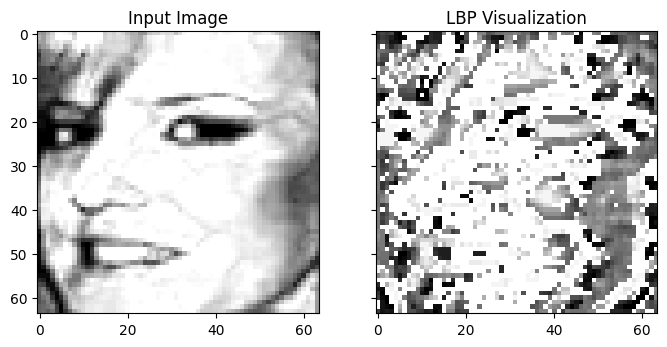

LBP Values:
[[ 7.  1.  0. ...  2.  3.  7.]
 [ 0.  0.  0. ...  3.  2. 25.]
 [25.  0.  0. ... 25. 25. 25.]
 ...
 [ 2. 25. 25. ...  3.  0.  0.]
 [ 8.  9. 25. ... 25.  0.  2.]
 [ 7.  8. 25. ...  2.  0.  2.]]


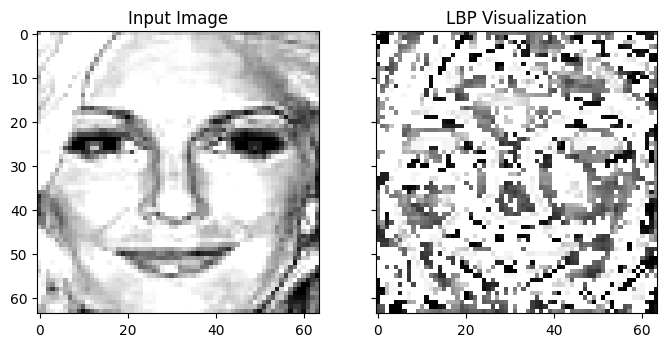

LBP Values:
[[24. 24. 24. ... 24.  0.  0.]
 [24. 24. 24. ... 24.  1.  0.]
 [24. 24. 24. ... 24. 24. 24.]
 ...
 [ 8.  9. 25. ... 12. 24. 24.]
 [ 7.  8.  3. ... 10. 24. 24.]
 [24.  6.  1. ...  9. 24. 24.]]


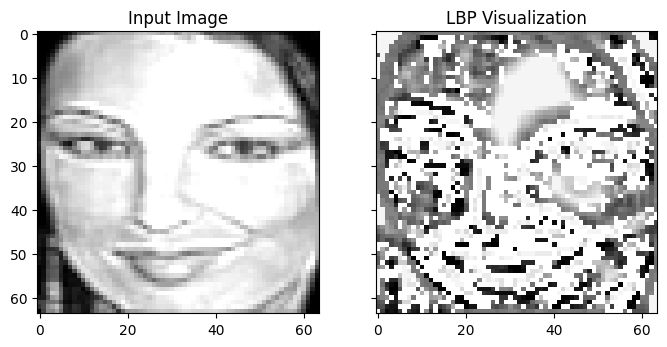

In [85]:
# Apply LBP feature extraction and visualization to the first five male images
print("LBP visualization for Male images:")
for i in range(5):
    compute_and_visualize_lbp(perc_sobel_male[i])

# Apply LBP feature extraction and visualization to the first five female images
print("LBP visualization for Female images:")
for i in range(5):
    compute_and_visualize_lbp(perc_sobel_female[i])

In [86]:
# Function to compute LBP features
def compute_lbp_features(image):
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    return lbp.ravel()  # Flatten the LBP array to use as features

# Assuming you have the lists gamma_corrected_male and gamma_corrected_female containing images

# Extract LBP features for male images
lbp_male_features = [compute_lbp_features(img) for img in perc_sobel_male]

# Extract LBP features for female images
lbp_female_features = [compute_lbp_features(img) for img in perc_sobel_female]

In [87]:
import pandas as pd

# Assuming you have all these feature lists already computed

# Creating DataFrames for each feature
lbp_male_df = pd.DataFrame(lbp_male_features, columns=[f"LBP_{i}" for i in range(len(lbp_male_features[0]))])
lbp_female_df = pd.DataFrame(lbp_female_features, columns=[f"LBP_{i}" for i in range(len(lbp_female_features[0]))])





In [88]:
hog_male_df = pd.DataFrame(hog_male_features, columns=[f"HOG_{i}" for i in range(len(hog_male_features[0]))])
hog_female_df = pd.DataFrame(hog_female_features, columns=[f"HOG_{i}" for i in range(len(hog_female_features[0]))])


In [89]:
# Adding Gender column
lbp_male_df['Gender'] = 0
lbp_female_df['Gender'] = 1





# Concatenating all the DataFrames
male_df = pd.concat([lbp_male_df, hog_male_df], axis=1)
female_df = pd.concat([lbp_female_df, hog_female_df], axis=1)


# Concatenating male and female DataFrames
all_data = pd.concat([male_df, female_df], ignore_index=True)

# Shuffle the data
all_data = all_data.sample(frac=1).reset_index(drop=True)
# Assuming the duplicate 'gender' columns are the first and second columns
all_data.drop(all_data.columns[1], axis=1, inplace=True)
all_data

LBP_0  LBP_2  LBP_3  LBP_4  LBP_5  LBP_6  LBP_7  LBP_8  LBP_9  LBP_10  \
0       7.0   25.0    1.0   25.0   25.0   13.0   13.0   25.0   13.0    10.0   
1       6.0   25.0    9.0   10.0   25.0    5.0    8.0    5.0   25.0    13.0   
2      24.0   24.0    8.0    8.0    8.0    6.0    9.0   11.0   13.0    12.0   
3      24.0    7.0   10.0   11.0   15.0   12.0   25.0   25.0    9.0     4.0   
4       9.0    4.0    0.0    0.0    0.0   13.0    3.0    3.0    0.0    25.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
4993   24.0    5.0   25.0   25.0   24.0   25.0    9.0    9.0   10.0    13.0   
4994   24.0   24.0   24.0   24.0   24.0   24.0   24.0   24.0   24.0    24.0   
4995    7.0   25.0   25.0    8.0    2.0   25.0    1.0   13.0   25.0    25.0   
4996   25.0   25.0   13.0    4.0   25.0   12.0   25.0   13.0    7.0    13.0   
4997   24.0   24.0   24.0   24.0   24.0   24.0   24.0   10.0    9.0     9.0   

      ...  HOG_1754  HOG_1755  HOG_1756  HOG_1757  HOG_1758  HOG_1759  \
0     ...  0.010552  0.135175  0.045353  0.347447  0.041574  0.147344   
1     ...  0.184104  0.068815  0.000000  0.061379  0.000000  0.023754   
2     ...  0.017992  0.243326  0.243326  0.243326  0.114762  0.243326   
3     ...  0.078179  0.272688  0.272688  0.272688  0.158120  0.039764   
4     ...  0.226488  0.226488  0.215846  0.057282  0.004702  0.059005   
...   ...       ...       ...       ...       ...       ...       ...   
4993  ...  0.034720  0.310356  0.162884  0.310356  0.049096  0.107201   
4994  ...  0.194766  0.305119  0.149698  0.251639  0.041619  0.105145   
4995  ...  0.021266  0.345110  0.158136  0.345110  0.016520  0.053066   
4996  ...  0.010253  0.158244  0.173409  0.337931  0.020693  0.086475   
4997  ...  0.024053  0.305401  0.200818  0.173416  0.000000  0.180881   

      HOG_1760  HOG_1761  HOG_1762  HOG_1763  
0     0.019501  0.085101  0.000000  0.000000  
1     0.000000  0.000000  0.028317  0.000000  
2     0.029095  0.052603  0.116487  0.149754  
3     0.000000  0.068510  0.193792  0.228581  
4     0.017637  0.005386  0.020716  0.133251  
...        ...       ...       ...       ...  
4993  0.013728  0.131563  0.261616  0.310356  
4994  0.076967  0.132129  0.097542  0.305119  
4995  0.015621  0.015565  0.043311  0.107525  
4996  0.000000  0.022853  0.028811  0.144244  
4997  0.000000  0.000000  0.000000  0.000000  

[4998 rows x 5860 columns]

In [90]:
## Let's start the modeling process

In [91]:
## Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.preprocessing import StandardScaler




In [92]:
# Extracting features (X) and labels (y)
X = all_data.drop('Gender', axis=1)  # Assuming 'Gender' is the label column
y = all_data['Gender']

# Displaying shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (4998, 5859)
Shape of y: (4998,)


In [93]:
y

0       1
1       1
2       0
3       0
4       0
       ..
4993    0
4994    1
4995    1
4996    1
4997    1
Name: Gender, Length: 4998, dtype: int64

In [94]:
## Normalizing the data just to see if any difference in accuracy
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Splitting the data into training and testing sets (assuming X and y are defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [96]:
# Initializing the SVM classifier
svm_classifier = SVC()



In [97]:
# Fitting the model on the training data
svm_classifier.fit(X_train, y_train)



SVC()

In [98]:
y_pred = svm_classifier.predict(X_test)



In [99]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       498
           1       0.81      0.77      0.79       502

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.79      1000
weighted avg       0.80      0.80      0.79      1000



In [100]:
import xgboost as xgb
from sklearn.model_selection import train_test_split





# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
# Predict labels for the test set
y_pred1 = xgb_model.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.896


In [103]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       498
           1       0.92      0.87      0.89       502

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [104]:
import lightgbm as lgb

# Initialize LGBM classifier
lgb_model = lgb.LGBMClassifier()

# Train the LGBM model
lgb_model.fit(X_train, y_train)

# Predict labels for the test set using LGBM
y_pred_lgbm = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 1998, number of negative: 2000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.284424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552295
[LightGBM] [Info] Number of data points in the train set: 3998, number of used features: 5859
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499750 -> initscore=-0.001001
[LightGBM] [Info] Start training from score -0.001001


In [105]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.905


In [106]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       498
           1       0.91      0.90      0.90       502

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.90      1000
weighted avg       0.91      0.91      0.90      1000



In [107]:
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2


In [108]:
# Function to compute HOG features and visualize the effect
def compute_and_visualize_hog(image):
    # Compute HOG features
    hog_features, hog_image = hog(image, visualize=True, pixels_per_cell=(8, 8), cells_per_block=(2, 2))

    # Print the HOG features (you can comment this line if the output is too lengthy)
    print("HOG Features:")
    print(hog_features)

    # Display the original image and HOG visualization
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Input Image')

    # Rescale histogram for better display
    hog_image_rescaled = cv2.resize(hog_image, (image.shape[1], image.shape[0]))

    ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax[1].set_title('HOG Visualization')
    plt.show()


HOG visualization for Male images:
HOG Features:
[0.13229078 0.10636824 0.09011634 ... 0.23643925 0.         0.23677731]


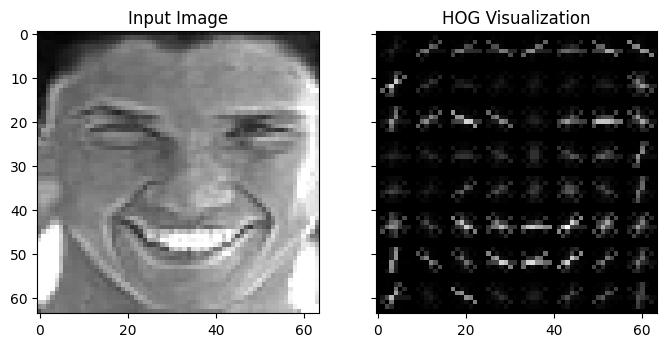

HOG Features:
[0.0313758  0.07373638 0.05637899 ... 0.069394   0.08012934 0.24274381]


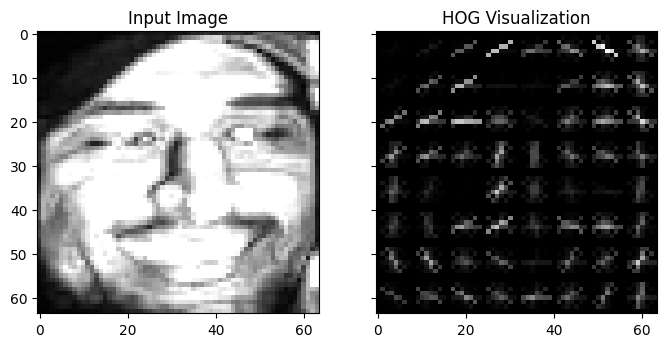

HOG Features:
[0.12231694 0.05192454 0.35613456 ... 0.         0.         0.06641327]


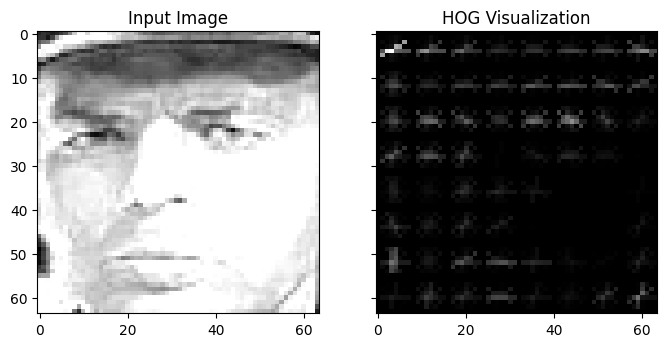

HOG Features:
[0.23270263 0.15510041 0.12387475 ... 0.31041226 0.05564697 0.        ]


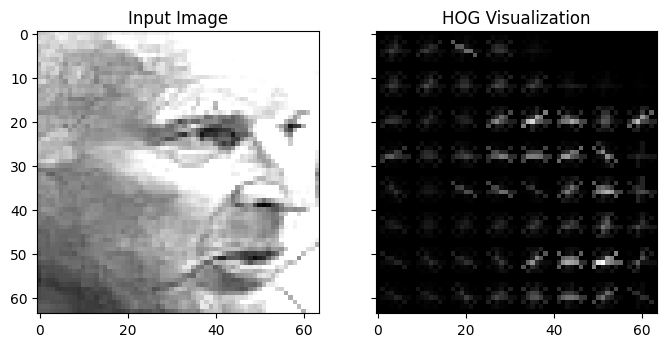

HOG Features:
[0.36638618 0.36638618 0.10472022 ... 0.13981117 0.12942428 0.26932812]


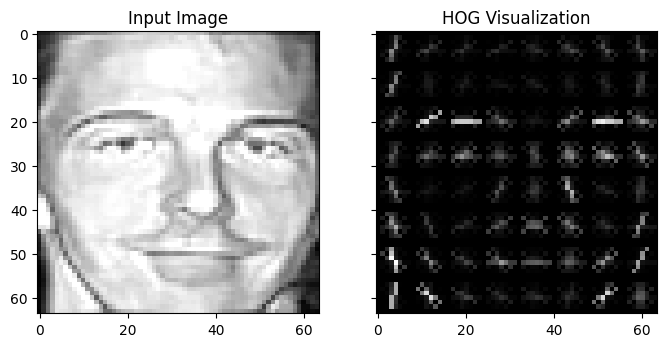

HOG visualization for Female images:
HOG Features:
[0.33488916 0.43649288 0.43649288 ... 0.05921288 0.02961639 0.04135138]


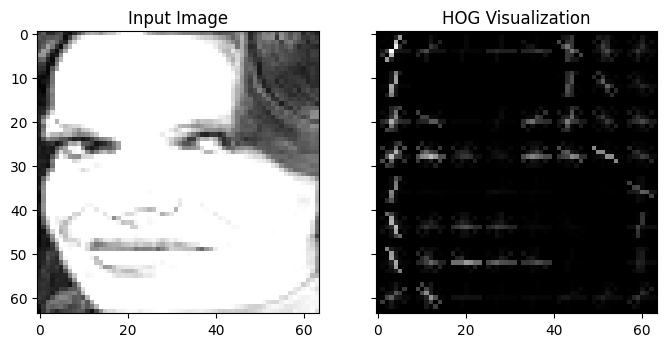

HOG Features:
[0.27182115 0.27182115 0.27182115 ... 0.         0.         0.01182363]


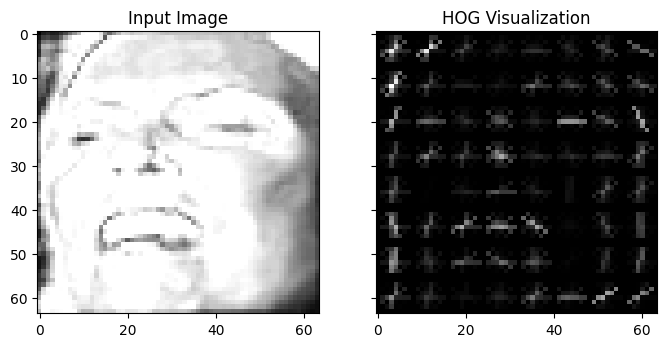

HOG Features:
[0.16931931 0.07387137 0.14953645 ... 0.         0.02993177 0.        ]


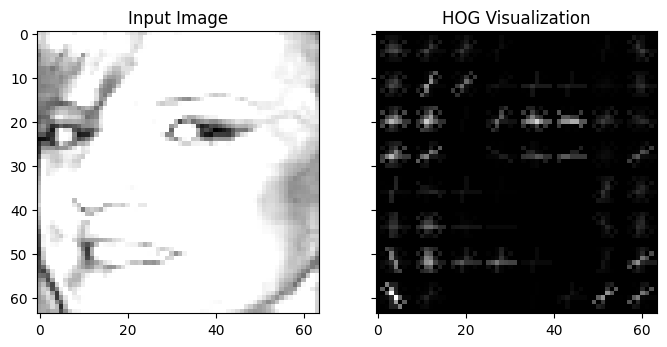

HOG Features:
[0.27422399 0.         0.         ... 0.         0.14137874 0.27458745]


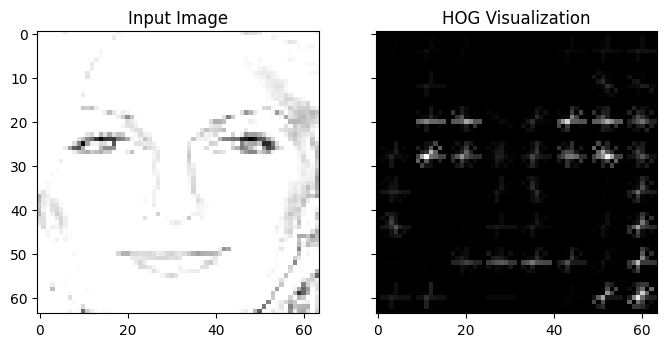

HOG Features:
[0.16266235 0.3714484  0.3714484  ... 0.03150523 0.0225431  0.02067968]


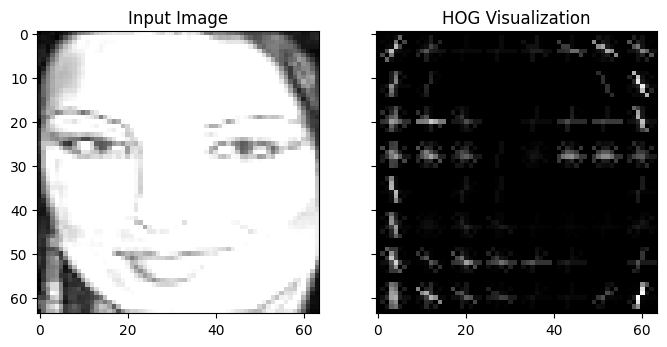

In [109]:
# Apply HOG feature extraction and visualization to the first five male images
print("HOG visualization for Male images:")
for i in range(5):
    compute_and_visualize_hog(gamma_sobel_male[i])

# Apply HOG feature extraction and visualization to the first five female images
print("HOG visualization for Female images:")
for i in range(5):
    compute_and_visualize_hog(gamma_sobel_female[i])

In [110]:
# Function to compute HOG features
def compute_hog_features(image):
    hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    return hog_features

# Assuming you have the lists gamma_corrected_male and gamma_corrected_female containing images

# Extract HOG features for male images
hog_male_features = [compute_hog_features(img) for img in gamma_sobel_male]

# Extract HOG features for female images
hog_female_features = [compute_hog_features(img) for img in gamma_sobel_female]

In [111]:
## Apply lbp for hist images

In [112]:
# Function to compute LBP features and visualize the effect
def compute_and_visualize_lbp(image):
    # Compute LBP features
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')

    # Print the LBP values (you can comment this line if the output is too lengthy)
    print("LBP Values:")
    print(lbp)

    # Display the original image and LBP visualization
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Input Image')

    ax[1].imshow(lbp, cmap='gray')
    ax[1].set_title('LBP Visualization')
    plt.show()

LBP visualization for Male images:
LBP Values:
[[ 7.  7.  6. ... 10.  5.  4.]
 [ 4.  8. 10. ...  8.  8.  5.]
 [ 6.  0.  2. ... 11. 10.  9.]
 ...
 [ 4.  4.  6. ...  8.  8. 10.]
 [ 5.  4. 25. ...  6.  7.  6.]
 [ 7. 25. 25. ...  5.  5.  5.]]


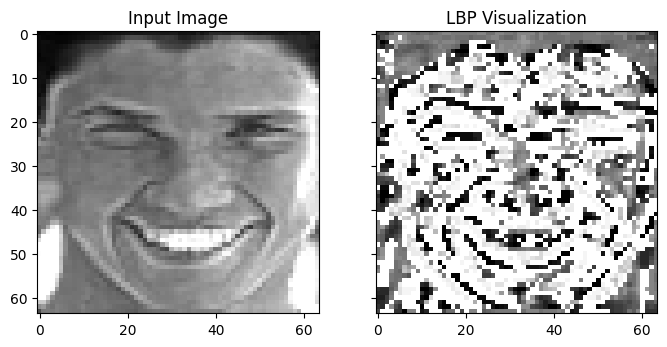

LBP Values:
[[ 7.  8. 11. ... 11.  9.  9.]
 [ 1.  1.  0. ... 11.  8.  6.]
 [ 0.  0.  1. ...  3.  2.  2.]
 ...
 [ 8. 11. 12. ...  3.  3. 25.]
 [ 7.  9. 10. ...  1.  0.  4.]
 [24. 10.  8. ...  2.  0.  2.]]


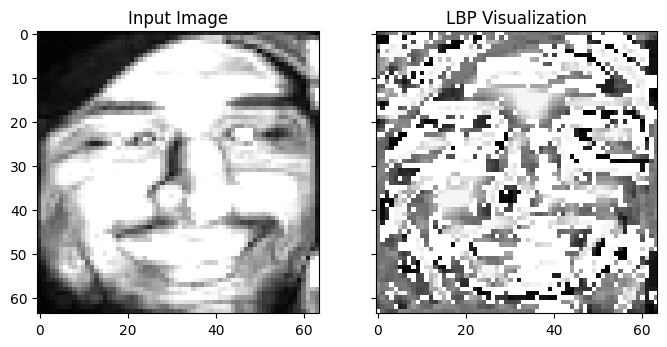

LBP Values:
[[ 6.  7. 10. ... 25.  8.  7.]
 [ 7. 10. 11. ...  2.  0.  0.]
 [ 7.  9. 12. ...  3.  1.  1.]
 ...
 [25. 25. 25. ... 25. 25. 10.]
 [25. 25. 25. ... 25. 25.  9.]
 [ 7.  8. 25. ...  2. 25.  7.]]


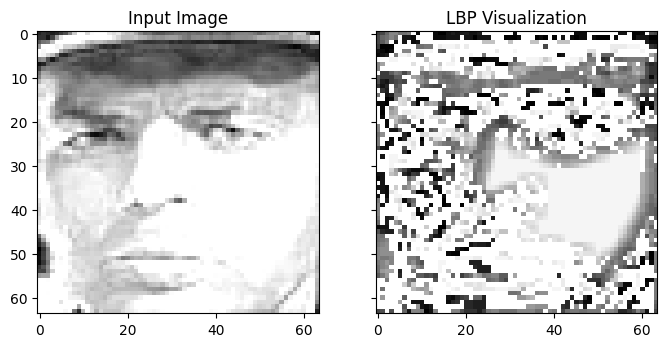

LBP Values:
[[ 6. 25. 25. ...  9.  8.  7.]
 [25. 25. 25. ... 10.  9.  8.]
 [ 0. 25. 25. ... 11. 10.  9.]
 ...
 [ 2.  0.  0. ...  7.  8.  8.]
 [ 0.  0.  0. ... 25.  6.  7.]
 [ 1.  0.  0. ... 25. 25.  5.]]


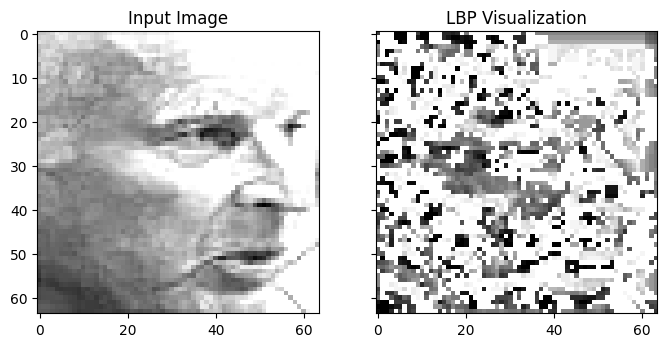

LBP Values:
[[ 6.  7.  9. ...  9.  6.  7.]
 [ 8.  8.  9. ...  8.  7.  8.]
 [10. 11. 12. ...  9.  8.  9.]
 ...
 [10. 10.  9. ...  9.  2.  0.]
 [ 9.  8.  7. ... 13.  9.  4.]
 [ 8.  6.  6. ... 12.  9.  7.]]


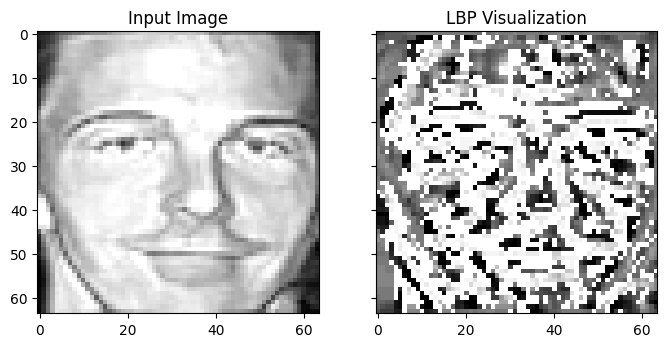

LBP visualization for Female images:
LBP Values:
[[ 6.  5. 10. ...  4.  5.  7.]
 [ 7.  8.  3. ... 25.  3. 25.]
 [ 8. 25.  2. ... 13. 25.  1.]
 ...
 [25. 25.  4. ... 25.  4.  3.]
 [ 9.  4.  4. ...  7.  3.  6.]
 [ 9. 25.  4. ... 25.  0.  7.]]


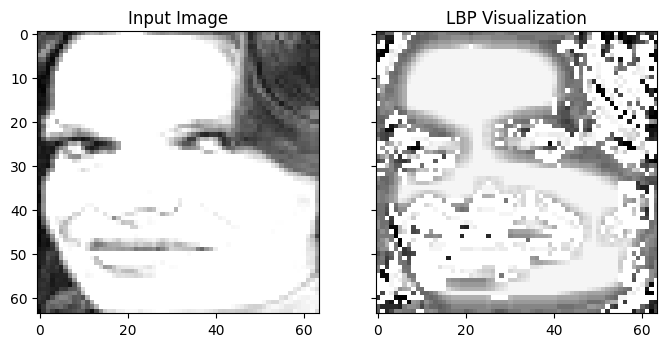

LBP Values:
[[ 8.  8.  9. ...  9.  8.  7.]
 [ 8.  7.  9. ... 10.  9.  8.]
 [ 9.  7. 25. ... 25. 10.  9.]
 ...
 [ 7.  5. 25. ... 11. 10.  9.]
 [ 6.  4.  5. ... 10.  9.  8.]
 [ 6.  5.  6. ...  9.  8.  7.]]


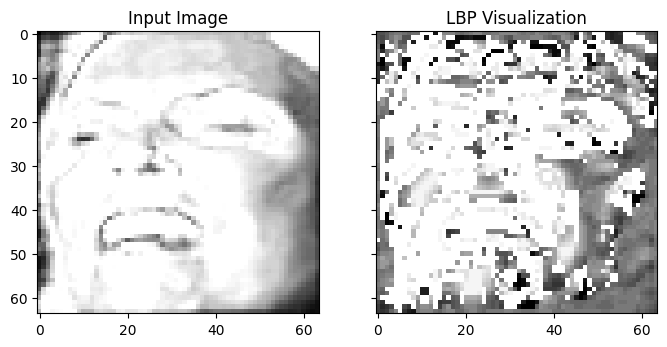

LBP Values:
[[ 5.  7.  6. ...  9.  8.  7.]
 [ 4.  6.  5. ... 25.  9.  8.]
 [ 5.  7.  4. ...  8.  6.  9.]
 ...
 [ 9. 25.  1. ... 25. 25.  9.]
 [ 7. 25.  2. ... 25.  8.  8.]
 [ 6.  7.  4. ...  8.  7.  7.]]


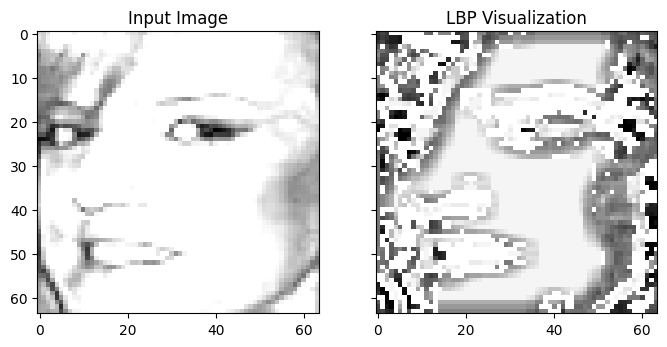

LBP Values:
[[ 7.  8.  7. ...  2.  3.  7.]
 [ 8.  9.  9. ... 25. 25. 25.]
 [ 9. 10. 10. ... 25. 25. 25.]
 ...
 [25. 25. 25. ...  1. 25. 25.]
 [25.  9. 25. ... 25.  1.  6.]
 [ 7.  8.  9. ... 25.  1.  5.]]


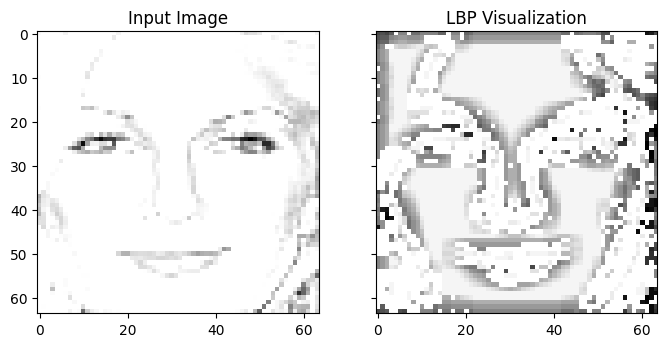

LBP Values:
[[ 7.  6. 25. ... 10.  0.  0.]
 [25. 25. 25. ...  7.  0.  0.]
 [10.  8. 11. ... 10.  8.  3.]
 ...
 [ 7.  9. 25. ... 11. 12. 10.]
 [ 6.  7.  3. ... 10. 10.  8.]
 [ 8.  5.  2. ...  9.  9.  8.]]


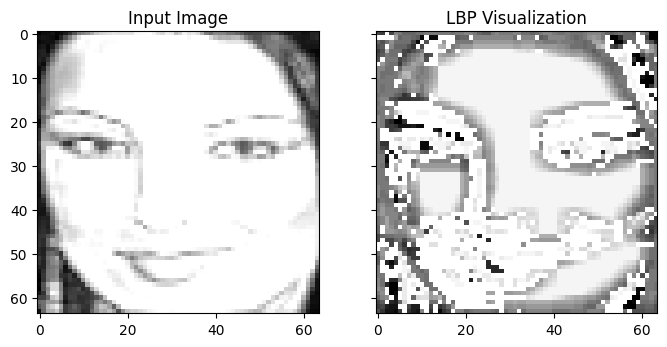

In [113]:
# Apply LBP feature extraction and visualization to the first five male images
print("LBP visualization for Male images:")
for i in range(5):
    compute_and_visualize_lbp(gamma_sobel_male[i])

# Apply LBP feature extraction and visualization to the first five female images
print("LBP visualization for Female images:")
for i in range(5):
    compute_and_visualize_lbp(gamma_sobel_female[i])

In [114]:
# Function to compute LBP features
def compute_lbp_features(image):
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    return lbp.ravel()  # Flatten the LBP array to use as features

# Assuming you have the lists gamma_corrected_male and gamma_corrected_female containing images

# Extract LBP features for male images
lbp_male_features = [compute_lbp_features(img) for img in gamma_sobel_male]

# Extract LBP features for female images
lbp_female_features = [compute_lbp_features(img) for img in gamma_sobel_female]

In [115]:
import pandas as pd

# Assuming you have all these feature lists already computed

# Creating DataFrames for each feature
lbp_male_df = pd.DataFrame(lbp_male_features, columns=[f"LBP_{i}" for i in range(len(lbp_male_features[0]))])
lbp_female_df = pd.DataFrame(lbp_female_features, columns=[f"LBP_{i}" for i in range(len(lbp_female_features[0]))])





In [116]:
hog_male_df = pd.DataFrame(hog_male_features, columns=[f"HOG_{i}" for i in range(len(hog_male_features[0]))])
hog_female_df = pd.DataFrame(hog_female_features, columns=[f"HOG_{i}" for i in range(len(hog_female_features[0]))])


In [117]:
# Adding Gender column
lbp_male_df['Gender'] = 0
lbp_female_df['Gender'] = 1





# Concatenating all the DataFrames
male_df = pd.concat([lbp_male_df, hog_male_df], axis=1)
female_df = pd.concat([lbp_female_df, hog_female_df], axis=1)


# Concatenating male and female DataFrames
all_data = pd.concat([male_df, female_df], ignore_index=True)

# Shuffle the data
all_data = all_data.sample(frac=1).reset_index(drop=True)
# Assuming the duplicate 'gender' columns are the first and second columns
all_data.drop(all_data.columns[1], axis=1, inplace=True)
all_data

LBP_0  LBP_2  LBP_3  LBP_4  LBP_5  LBP_6  LBP_7  LBP_8  LBP_9  LBP_10  \
0       5.0   10.0   13.0    9.0   10.0   10.0   11.0   12.0   12.0     9.0   
1       6.0   10.0   13.0   10.0   12.0   12.0   12.0   10.0   11.0    13.0   
2       6.0    8.0    8.0    9.0    4.0    2.0    3.0   25.0   13.0    25.0   
3       6.0    7.0    8.0    9.0    9.0   10.0   11.0   12.0   12.0    12.0   
4       7.0    9.0   25.0    3.0    5.0   13.0    7.0    3.0   25.0    25.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
4993    1.0   25.0    2.0    2.0    1.0   13.0   13.0   13.0    9.0    10.0   
4994    7.0   25.0    1.0   25.0   25.0   12.0   13.0   25.0   13.0     9.0   
4995   25.0   10.0    0.0   25.0   25.0   13.0   25.0   10.0   11.0    12.0   
4996    5.0   10.0   13.0   25.0   25.0   25.0   25.0   12.0   13.0    11.0   
4997    7.0   10.0   11.0   11.0   10.0    9.0   10.0   13.0   13.0    12.0   

      ...  HOG_1754  HOG_1755  HOG_1756  HOG_1757  HOG_1758  HOG_1759  \
0     ...  0.179178  0.078326  0.052687  0.017974  0.046157  0.046069   
1     ...  0.013366  0.122969  0.068778  0.205060  0.034231  0.082012   
2     ...  0.037765  0.159647  0.271611  0.298881  0.151383  0.060368   
3     ...  0.000000  0.290175  0.120220  0.273752  0.092226  0.073819   
4     ...  0.000000  0.390708  0.390708  0.390708  0.096227  0.129608   
...   ...       ...       ...       ...       ...       ...       ...   
4993  ...  0.048010  0.050678  0.070020  0.279313  0.011049  0.024207   
4994  ...  0.010790  0.056575  0.034526  0.324265  0.000000  0.109469   
4995  ...  0.038087  0.303343  0.236676  0.075333  0.020101  0.074673   
4996  ...  0.030205  0.164331  0.368755  0.368755  0.196229  0.208270   
4997  ...  0.000000  0.365106  0.365106  0.220381  0.365106  0.365106   

      HOG_1760  HOG_1761  HOG_1762  HOG_1763  
0     0.073364  0.134269  0.263902  0.077224  
1     0.053165  0.113350  0.000000  0.009568  
2     0.015217  0.016665  0.013103  0.010682  
3     0.035171  0.114346  0.226828  0.094009  
4     0.000000  0.000000  0.000000  0.000000  
...        ...       ...       ...       ...  
4993  0.009306  0.008385  0.005053  0.022682  
4994  0.027474  0.028361  0.012625  0.000000  
4995  0.010245  0.050420  0.078988  0.146748  
4996  0.036051  0.000000  0.023110  0.028719  
4997  0.028616  0.000000  0.088766  0.044204  

[4998 rows x 5860 columns]

In [118]:
## Let's start the modeling process

In [119]:
## Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.preprocessing import StandardScaler




In [120]:
# Extracting features (X) and labels (y)
X = all_data.drop('Gender', axis=1)  # Assuming 'Gender' is the label column
y = all_data['Gender']

# Displaying shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (4998, 5859)
Shape of y: (4998,)


In [121]:
y

0       0
1       0
2       1
3       0
4       1
       ..
4993    1
4994    1
4995    1
4996    0
4997    0
Name: Gender, Length: 4998, dtype: int64

In [122]:
## Normalizing the data just to see if any difference in accuracy
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Splitting the data into training and testing sets (assuming X and y are defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [124]:
# Initializing the SVM classifier
svm_classifier = SVC()



In [125]:
# Fitting the model on the training data
svm_classifier.fit(X_train, y_train)



SVC()

In [126]:
y_pred = svm_classifier.predict(X_test)



In [127]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       495
           1       0.80      0.79      0.80       505

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



In [128]:
import xgboost as xgb
from sklearn.model_selection import train_test_split





# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [129]:
# Predict labels for the test set
y_pred1 = xgb_model.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.883


In [131]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       495
           1       0.89      0.88      0.88       505

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [132]:
import lightgbm as lgb

# Initialize LGBM classifier
lgb_model = lgb.LGBMClassifier()

# Train the LGBM model
lgb_model.fit(X_train, y_train)

# Predict labels for the test set using LGBM
y_pred_lgbm = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 1995, number of negative: 2003
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.344287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 551269
[LightGBM] [Info] Number of data points in the train set: 3998, number of used features: 5859
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498999 -> initscore=-0.004002
[LightGBM] [Info] Start training from score -0.004002


In [133]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.875


In [134]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       495
           1       0.88      0.87      0.88       505

    accuracy                           0.88      1000
   macro avg       0.87      0.88      0.87      1000
weighted avg       0.88      0.88      0.88      1000

